<div style="text-align: center;"> <h3>Data Mining and Wrangling</h3>
<h5>Summative Assessment 1</h5>
<h5><u>By Romand Lansangan</u></h5>
    </div>
    
---

## Intro to Modern Data Mining

### Load the dataset and provide an overview of its structure (e.g., dimensions, missing values, types of variables).

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
df = pd.read_csv("customer_churn.csv", index_col="CustomerID")
print("Shape:", df.shape)
print(df.info())
df.head()

Shape: (10000, 11)
<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, CUST00001 to CUST10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           10000 non-null  object 
 1   SeniorCitizen    10000 non-null  int64  
 2   Partner          10000 non-null  object 
 3   Dependents       10000 non-null  object 
 4   Tenure           10000 non-null  int64  
 5   PhoneService     10000 non-null  object 
 6   InternetService  10000 non-null  object 
 7   Contract         10000 non-null  object 
 8   MonthlyCharges   10000 non-null  float64
 9   TotalCharges     10000 non-null  float64
 10  Churn            10000 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 937.5+ KB
None


,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,InternetService,Contract,MonthlyCharges,TotalCharges,Churn
CustomerID,,,,,,,,,,,
CUST00001,Male,0,No,No,65,Yes,Fiber optic,Month-to-month,20.04,1302.60,No
CUST00002,Male,0,No,No,26,Yes,Fiber optic,Month-to-month,65.14,1693.64,No
CUST00003,Male,0,Yes,No,54,Yes,Fiber optic,Month-to-month,49.38,2666.52,No
CUST00004,Female,0,Yes,Yes,70,Yes,DSL,One year,31.19,2183.30,No
CUST00005,Male,0,No,No,53,Yes,DSL,Month-to-month,103.86,5504.58,Yes


In [115]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: "No", 1: "Yes"})


In [116]:
unique_df = pd.concat([df.nunique(), df.agg(np.unique)], axis=1)
unique_df.rename(columns={0: "N_unique", 1 : "unique"}, inplace=True)
unique_df

,N_unique,unique
Gender,2,"[Female, Male]"
SeniorCitizen,2,"[No, Yes]"
Partner,2,"[No, Yes]"
Dependents,2,"[No, Yes]"
Tenure,72,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
PhoneService,2,"[No, Yes]"
InternetService,3,"[DSL, Fiber optic, No]"
Contract,3,"[Month-to-month, One year, Two year]"
MonthlyCharges,6366,"[20.02, 20.03, 20.04, 20.05, 20.07, 20.08, 20...."
TotalCharges,9610,"[0.0, 20.1, 20.38, 21.1, 21.27, 21.75, 21.97, ..."


### Explain why data mining is important for this dataset.

Mining this particular dataset is crucial for the business, an internet service provider it seems, because it might provide some key information to improvement in business process:
* `Customer Segmentation` - We can use data mining to cluster customer's into distinct classes based on factors like age, gender, internet services, and such.
* `Churn` - this column tells us which customer have decided to end their relationship/subription with the company and its services. Data mining will helps find the common patterns among those who have left and those who stays. Through data mining, we could predict which customer's are more likely to leave. This is crucial for retaining customers for longer period.
* `Factors` - consequently, we can identify some key factors to determine whether a customer will stay or leave, and make adjustments based on these insights.
* `Optimazation` - ultimately, the goal of Data Mining in this case is to optimize the business by revealing inefficiencies and scarcity in its services, and of course, make necessary adjustments and decisions to make the company both efficient and profitable.

## Data Visualization

Create at least three meaningful visualizations to explore relationships in the data (e.g., churn rate by tenure, service type, or monthly charges).

Text(0.5, 1.0, 'Normalized Count Per Churn')

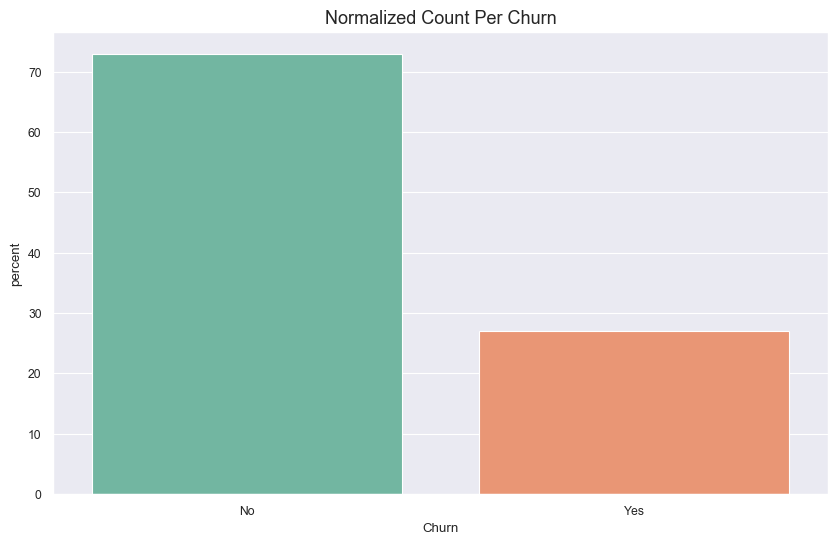

In [119]:
sns.set_context("paper")
sns.set_style("darkgrid")

plt.figure(figsize=(10,6))
sns.countplot(df, x="Churn", hue="Churn", stat="percent", palette="Set2")
plt.title("Normalized Count Per Churn", fontsize=13)

Starting with simple count distribution, it appears as though around 30% of our customer have `Churn=Yes`. Meaning around 30% of customers have left the company and its services.

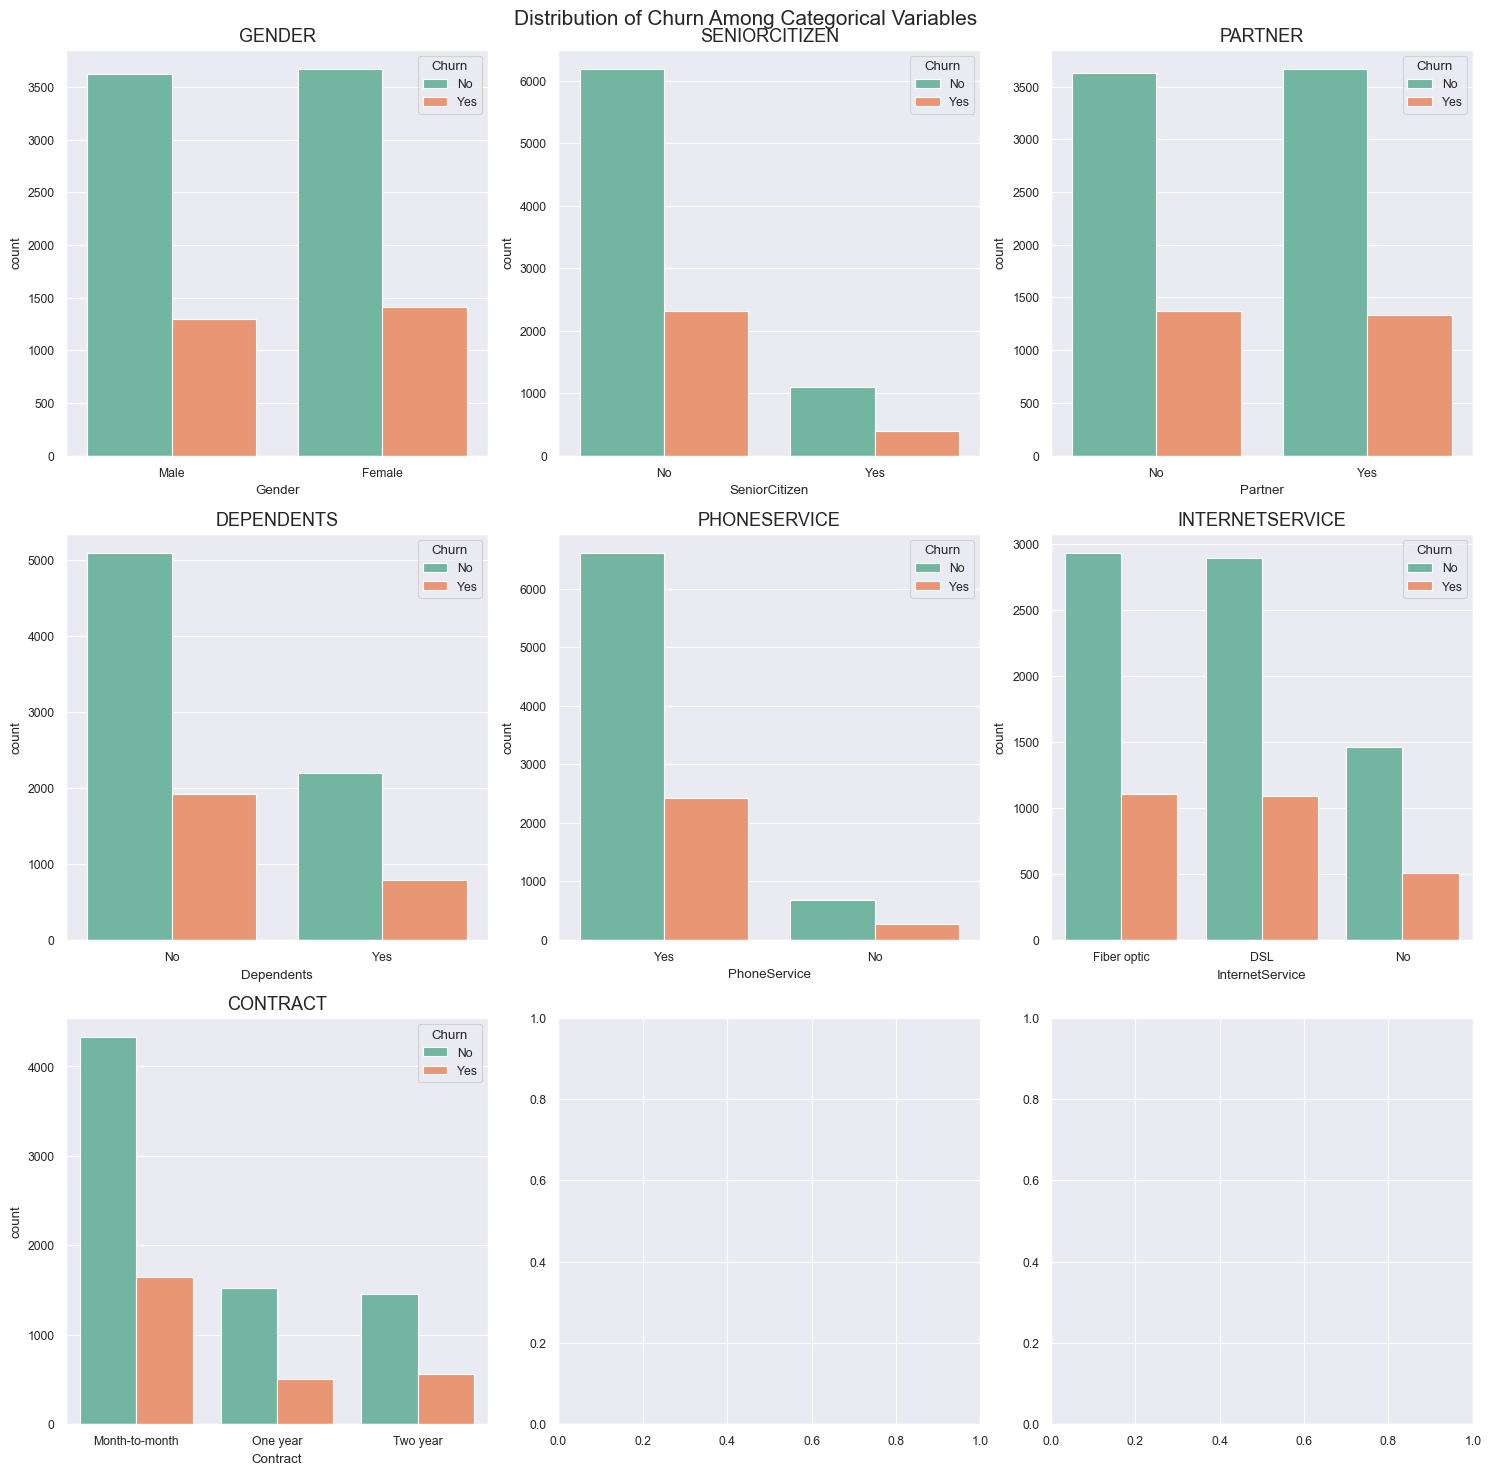

In [121]:
categorical_vars = df.select_dtypes(include='object').drop(columns="Churn").columns
ceil = int(np.ceil(len(categorical_vars)/ 3))

fig, ax = plt.subplots(ncols=3, nrows=ceil, figsize=(15, 5*ceil))

axes = ax.flatten()

for ax_n, var in zip(axes, categorical_vars):
    sns.countplot(x=df[var], hue=df["Churn"], ax=ax_n, palette="Set2")
    ax_n.set_title(var.upper(), fontsize=13)


fig.suptitle("Distribution of Churn Among Categorical Variables", fontsize=15)
plt.tight_layout();

From the figure above, we can begin to have a good idea of the attributes of the customer's eventually leaves (`Churn=Yes`, red) and from those who stays (`Churn=No`, green).
* `Gender` - the simillarity between Male and Female distribution implies that gender alone may not be a strong predictor for `Churn` status.
* `Partner` -  same as the `Gender` relationship.
* `For the rest` - although there exist a disparaty between different types under a certain column, the proportion of churners and non-churners appears to be exactly the same relative to the size of the said type.

It is interesting how all the categorical variables by themeselves aren't strong predictors for `Churn` status, at least visually. I'm intruigue how therese variables interact with each other. 

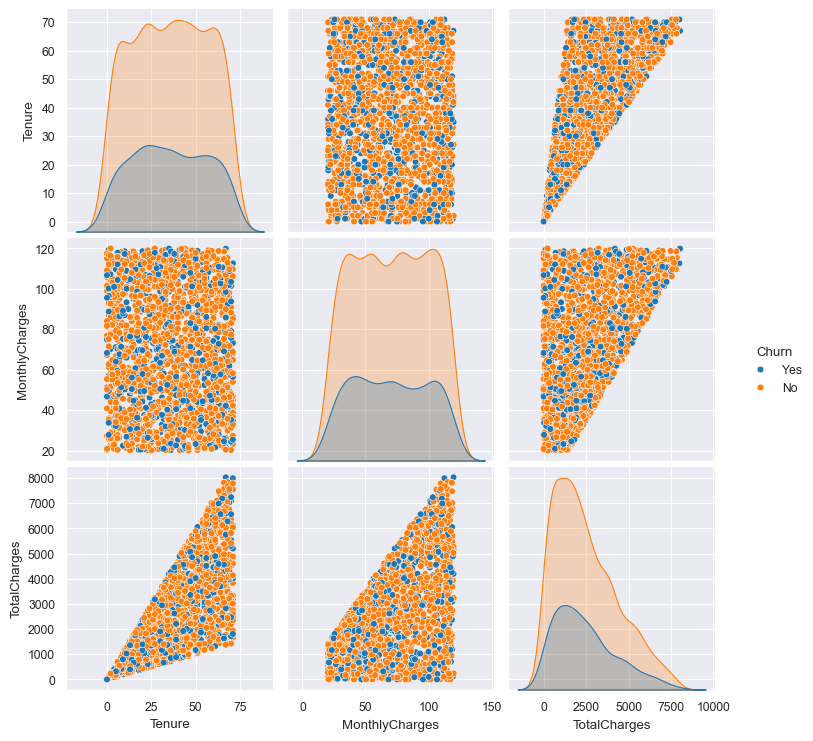

In [123]:
df_samples = df.sample(int(len(df)*0.20))
df_cols_floats = df_samples.select_dtypes("number").columns
sns.pairplot(df_samples[list(df_cols_floats) + ['Churn']], hue='Churn');

Simillar to the discrete variables, the continous ones also doesn't seem to show any particular trend or distinction when it comes to churners and non-churners. It is also the case that both churners and non-churners have mixed distribution through all the scatter plots, making it hard to create a clear distinction.

However, disregarding the `churner` part for a bit, we can can see some patterns that tells us the realtionship between continous variables in the scatterplots. 

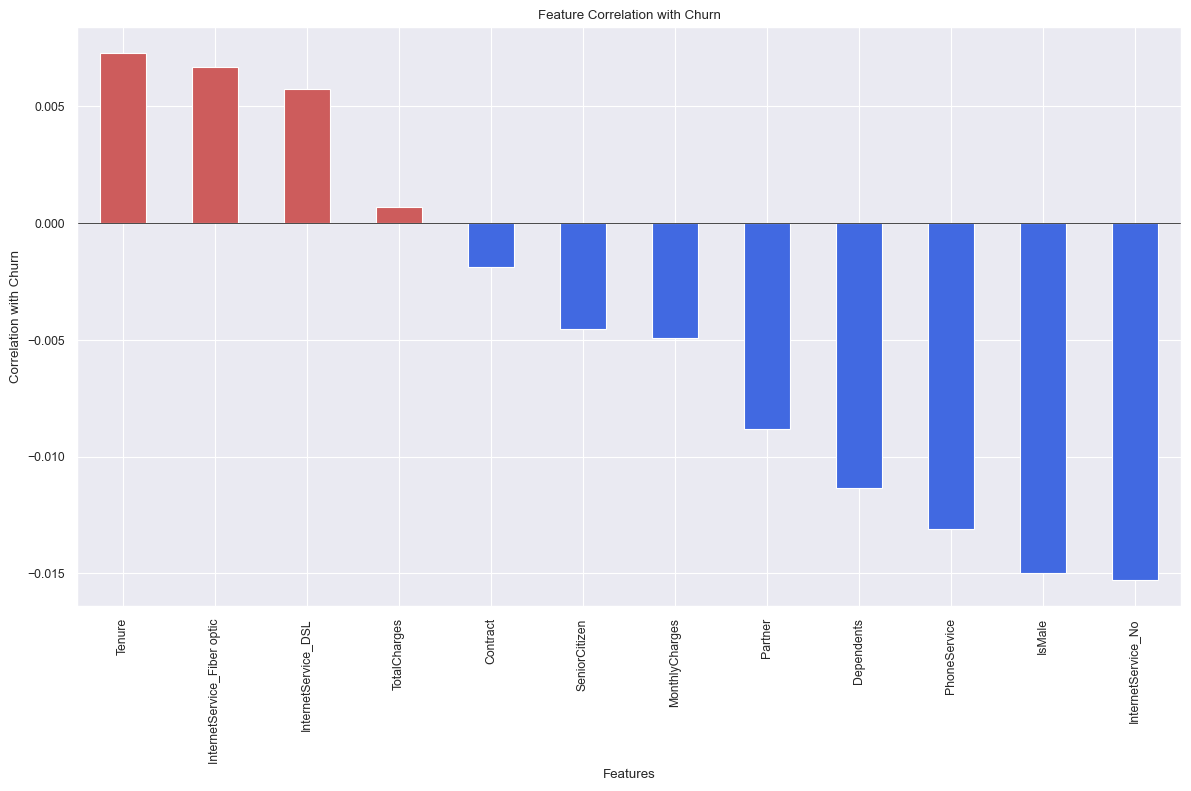

In [125]:
df_final = X_transformed.copy()
df_final['Churn'] = y_coded

corr_with_churn = df_final.corr()['Churn'].drop('Churn').sort_values(ascending=False)

plt.figure(figsize=(12, 8))
corr_with_churn.plot(kind='bar', color=corr_with_churn.map(lambda x: 'indianred' if x > 0 else 'royalblue'))
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.xlabel('Features')
plt.ylabel('Correlation with Churn')
plt.title('Feature Correlation with Churn')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Just for the record this was done after some Data Transformation but I thought I would add it here for it provide a meaningful insight to the data.

So it seems that `Tenure` is the most possitively correleted feature to `Churn`, followed by `InternetService_Fiber optic`. The "most" negatively correlated features are `IsMale` (or the gender) and `InternetService_No`. That's all good and all until we notice the magnitude of these correlations. Essentially there exist no correlation between feature varaibles and the response variable. Which might not be ideal and thus it is imperative to conduct a thorough Feature Engineering just to juice out some relationship between our features and the response.

Most of the time though, this isn't a good data, we might want to request for additional features like `SocioEconomic Class` or whatnot. Nonetheless, let us do everything we could to make something out of this.

## Data Transformation
### Handle missing values appropriately.

In [128]:
df.isna().sum()

Gender             0
SeniorCitizen      0
Partner            0
Dependents         0
Tenure             0
PhoneService       0
InternetService    0
Contract           0
MonthlyCharges     0
TotalCharges       0
Churn              0
dtype: int64

In [129]:
df.describe()

,Tenure,MonthlyCharges,TotalCharges
count,10000.000000,10000.000000,10000.000000
mean,35.220600,70.179457,2455.809794
std,20.787216,29.027645,1854.590358
min,0.000000,20.020000,0.000000
25%,17.000000,44.880000,961.207500
50%,35.000000,70.555000,2025.580000
75%,53.000000,95.772500,3610.985000
max,71.000000,119.990000,8425.570000


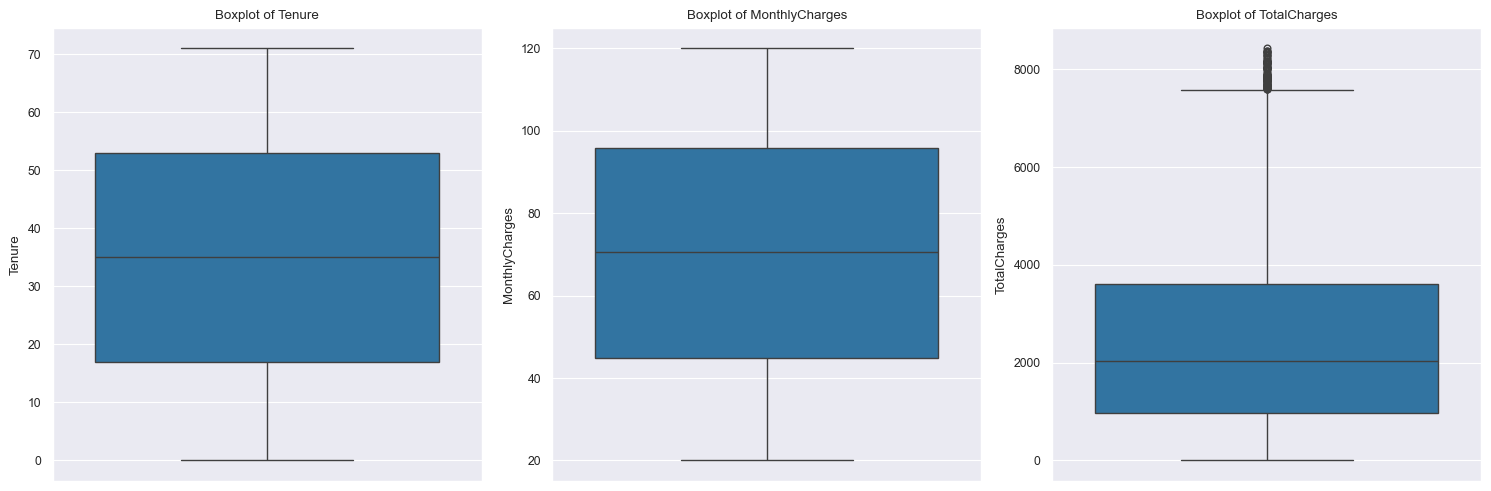

In [130]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
col_cont = ['Tenure', 'MonthlyCharges', 'TotalCharges']

for i, col in enumerate(col_cont):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

Total Flagged Outliers: 72
Percentage: 0.72%


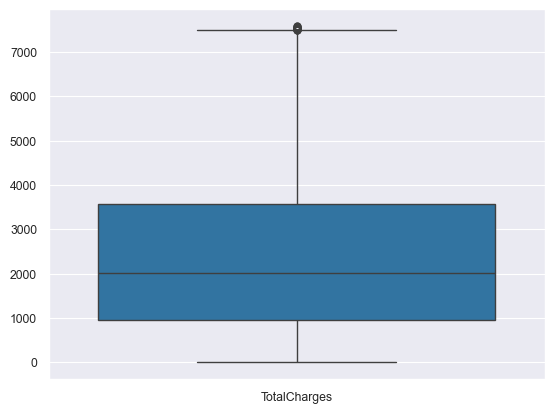

In [131]:

def remove_outliers(df, cols_with_outliers):
    df_ = df.copy()
    for col in cols_with_outliers:
        samp = df_[col]
        q1, q3 = samp.quantile([0.25, 0.75])
        iqr = q3 - q1
        lower, upper = (q1 - 1.5*iqr, q3 + 1.5*iqr)
        safe = samp.between(lower, upper, inclusive="both")
        total_outliers = (~(safe)).sum()
        print("Total Flagged Outliers:",total_outliers)
        print(f"Percentage: {total_outliers*100/len(df)}%")

        df_ = df_[safe]
    return df_


outlier = ['TotalCharges']

df_no_outliers = remove_outliers(df, outlier)
sns.boxplot(df_no_outliers[outlier]);

### Split
Let us first split the data to prevent data leakage.

In [133]:
from sklearn.model_selection import train_test_split

target = "Churn"

features = df_no_outliers.drop(columns=target).columns

X = df_no_outliers[features]
y = df_no_outliers[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

df_train = pd.concat([X_train, y_train], axis=1)

### Convert categorical variables into factor variables.

In [135]:
unique_df = pd.concat([df_train.nunique(), df_train.agg(np.unique)], axis=1)
unique_df.rename(columns={0: "N_unique", 1 : "unique"}, inplace=True)
unique_df

,N_unique,unique
Gender,2,"[Female, Male]"
SeniorCitizen,2,"[No, Yes]"
Partner,2,"[No, Yes]"
Dependents,2,"[No, Yes]"
Tenure,72,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
PhoneService,2,"[No, Yes]"
InternetService,3,"[DSL, Fiber optic, No]"
Contract,3,"[Month-to-month, One year, Two year]"
MonthlyCharges,5528,"[20.02, 20.03, 20.04, 20.05, 20.07, 20.08, 20...."
TotalCharges,7660,"[0.0, 20.1, 20.38, 21.1, 21.75, 21.97, 22.8, 2..."


We'll use binary encoding for columns that have [No, Yes] as their column values, specifically:
* `SeniorCitizen`
* `Partner`
* `Dependents`
* `PhoneSerice`
* `InternetService`
* `Churn`

Note that the 'Yes' values for these columns will be the positive class or the encoded values as 1. 

We also ought to convert the column `Gender` to `IsMale` to make sense of binary encoding. 1 will be for male and 0 will be for female. 

For `Contract`, we'll use nominal encoding with the following mapping: {"Month-to-month" : 0, "One year" : 1, "Two year" : 2}. This is because of the inherent order in the values.

However, for `InternetService`, we can't assert any inherent order for its values, [DSL, Fiber optic, No]. For that reason, we'll use One-Hot-Encoding for this. Basically, we'll separate these three values into their own columns and have each row take the values of 0 or 1 for each of these new columns. If a row is `DSL=1`, it will also be `Fiber Optic=0` and `No=0`. This will prevent the machine to falsely assume any particular order among these values.

In [137]:
from sklearn.base import BaseEstimator, TransformerMixin
from CustomTransformer import add_transformations

def codify(X, transformer):
    df_coded = X.copy()
    
    mapping = {"No": 0, "Yes": 1}
    binary_cols = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService']
    
    for col in binary_cols:
        if col in df_coded.columns:
            df_coded[col] = df_coded[col].map(mapping)
    
    if "Gender" in df_coded.columns:
        df_coded['IsMale'] = df_coded["Gender"].map({"Female": 0, "Male": 1})
        df_coded.drop(columns="Gender", inplace=True)
    
    if "Contract" in df_coded.columns:
        df_coded['Contract'] = df_coded['Contract'].map({
            "Month-to-month": 0, 
            "One year": 1, 
            "Two year": 2
        })
    
    # One hot encoding
    if "InternetService" in df_coded.columns:
        df_coded = pd.get_dummies(df_coded, columns=['InternetService'], dtype=int)
    
    return df_coded

@add_transformations(codify)
class CodingTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, name="coding_transformer"):
        self.name = name
    
    def fit(self, X, y=None):
        return self

a = CodingTransformer()
a.fit(X=X)

y_coded = y.map({"No": 0, "Yes": 1})
X_coded = a.transform(X)

df_coded = pd.concat([X_coded,y_coded], axis=1)
unique_df_coded = pd.concat([df_coded.nunique(), df_coded.agg(np.unique), df_coded.dtypes], axis=1)
unique_df_coded.rename(columns={0: "N_unique", 1 : "unique", 2: "dtypes"}, inplace=True)
unique_df_coded



,N_unique,unique,dtypes
SeniorCitizen,2,"[0, 1]",int64
Partner,2,"[0, 1]",int64
Dependents,2,"[0, 1]",int64
Tenure,72,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",int64
PhoneService,2,"[0, 1]",int64
Contract,3,"[0, 1, 2]",int64
MonthlyCharges,6340,"[20.02, 20.03, 20.04, 20.05, 20.07, 20.08, 20....",float64
TotalCharges,9539,"[0.0, 20.1, 20.38, 21.1, 21.27, 21.75, 21.97, ...",float64
IsMale,2,"[0, 1]",int64
InternetService_DSL,2,"[0, 1]",int32


### Normalize or standardize numerical features where necessary.

In [139]:
def standardized(X, transformer):
    X_coded = X.copy()

    cols_to_stdize = transformer.cols_to_stdize

    for col in cols_to_stdize:
        if col in X_coded.columns:
            mean = X_coded[col].mean()
            std = X_coded[col].std()
            X_coded[col] = (X_coded[col]-mean)/ std

    return X_coded

@add_transformations(codify, standardized)
class CustomTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, cols_to_stdize=['Tenure', 'MonthlyCharges', 'TotalCharges']):
        self.cols_to_stdize = cols_to_stdize
        
    def fit(self, X, y=None):
        return self

b = CustomTransformer()

b.fit(X, y)

X_transformed = b.transform(X)

cols_to_standardize = ['Tenure', 'MonthlyCharges', 'TotalCharges']
X_transformed[cols_to_standardize].agg(["mean", "std"]).round()

,Tenure,MonthlyCharges,TotalCharges
mean,0.0,0.0,0.0
std,1.0,1.0,1.0


### Create new derived variables that may help in predictive modeling.

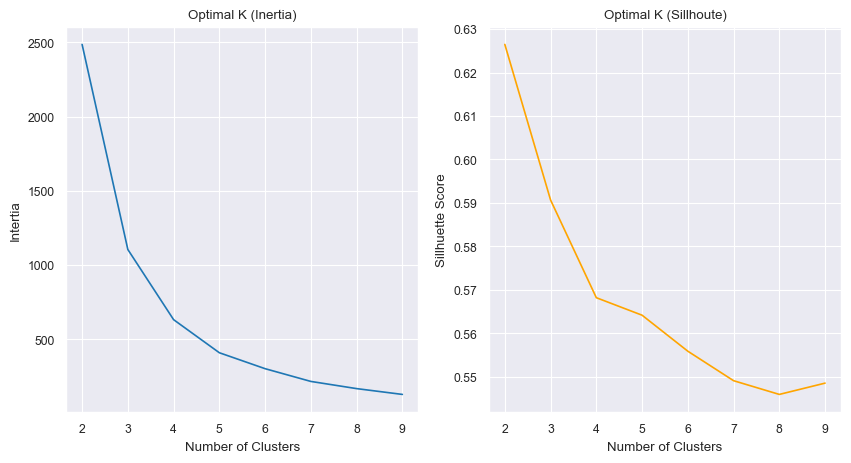

In [141]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

intertia = []
silhouette = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_transformed['Tenure'].to_frame())
    intertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_transformed['Tenure'].to_frame(), kmeans.labels_))


fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5))

ax[0].plot(range(2, 10), intertia)
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Intertia')
ax[0].set_title('Optimal K (Inertia)')

ax[1].plot(range(2, 10), silhouette, color="orange")
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Sillhuette Score')
ax[1].set_title('Optimal K (Sillhoute)')
plt.show()

In [142]:
intertia = np.array(intertia)
mean_i = np.mean(intertia)
std_i = np.std(intertia)
stdz_i = (intertia - mean_i )/ std_i
stdz_i = stdz_i*-1

mean_s = np.mean(silhouette)
std_s = np.std(silhouette)
stdz_s = (silhouette - mean_s )/ std_s

In [143]:
weight_inertia = 0.4
weight_silhouette = 0.6

combined_score = (weight_inertia * stdz_i) + (weight_silhouette * stdz_s)
result = pd.Series(combined_score).sort_values(ascending=False)
result.index = result.index + 2
result

2    0.377720
3    0.285913
5    0.042058
4    0.016165
6   -0.093151
9   -0.171103
7   -0.205034
8   -0.252569
dtype: float64

We can either choose `n_clusters=2` or `n_clusters=3` since both groups are higher than the rest. Let us choose `n_clusters=3` for more granuality.

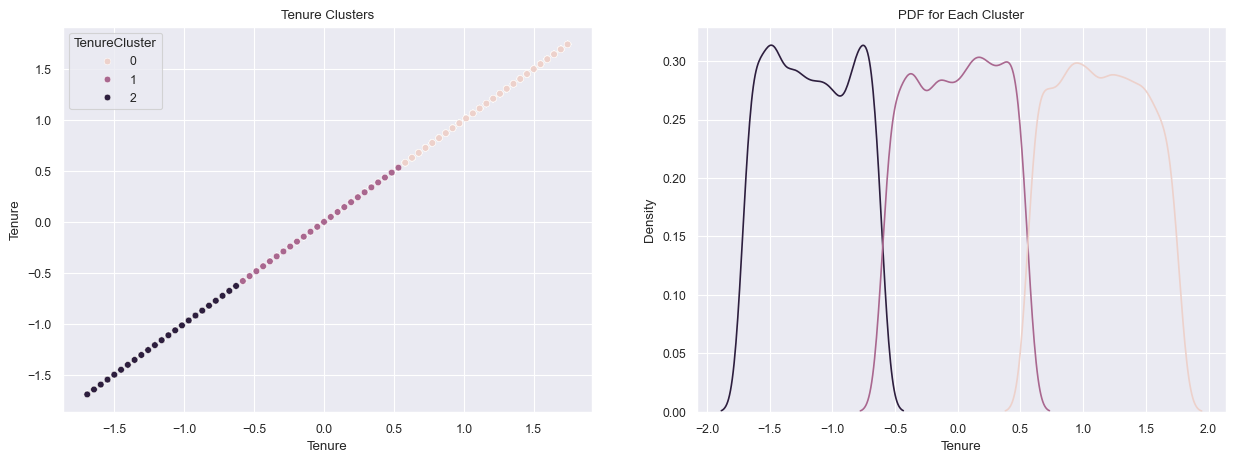

In [145]:
kmeans_final = KMeans(n_clusters=3, random_state=42).fit(X_transformed[['Tenure']])
X_transformed['TenureCluster'] = kmeans_final.predict(X_transformed[['Tenure']])

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15,5))

sns.scatterplot(X_transformed, x="Tenure", y="Tenure", hue="TenureCluster", ax=ax[0])
ax[0].set_title("Tenure Clusters")
sns.kdeplot(X_transformed, x="Tenure", hue="TenureCluster", ax=ax[1], legend=False)
ax[1].set_title("PDF for Each Cluster");

In [146]:
import pickle
with open('kmeans_tenure_cluster_model.pkl', 'wb') as f:
    pickle.dump(kmeans_final, f)

#### Average `MonthlyCharges` and Average `TotalCharges` Per Cluster

In [148]:
cluster_means = (
    X_transformed.groupby("TenureCluster")[['MonthlyCharges', 'TotalCharges']]
    .mean()
    .rename(columns={"MonthlyCharges": "AvgMonthlyCharges", 
                     "TotalCharges" : "AvgTotalCharges"})
                     )

cluster_means

,AvgMonthlyCharges,AvgTotalCharges
TenureCluster,,
0,-0.075794,0.858080
1,0.053915,0.032411
2,0.022791,-0.911248


In [149]:
X_transformed = X_transformed.merge(cluster_means, how='left', left_on='TenureCluster', right_index=True)
X_transformed['DevMonthlyCharges'] =  X_transformed['AvgMonthlyCharges'] - X_transformed['MonthlyCharges']
X_transformed['DevTotalCharges'] = X_transformed['AvgTotalCharges'] - X_transformed['TotalCharges']
X_transformed.head()

,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,Contract,MonthlyCharges,TotalCharges,IsMale,InternetService_DSL,InternetService_Fiber optic,InternetService_No,TenureCluster,AvgMonthlyCharges,AvgTotalCharges,DevMonthlyCharges,DevTotalCharges
CustomerID,,,,,,,,,,,,,,,,,
CUST00001,0,0,0,1.452599,1,0,-1.725329,-0.618127,1,0,1,0,0,-0.075794,0.858080,1.649536,1.476208
CUST00002,0,0,0,-0.434474,1,0,-0.163098,-0.401054,1,0,1,0,1,0.053915,0.032411,0.217012,0.433466
CUST00003,0,1,0,0.920347,1,0,-0.709013,0.139008,1,0,1,0,0,-0.075794,0.858080,0.633219,0.719072
CUST00004,0,1,1,1.694531,1,1,-1.339101,-0.129236,0,1,0,0,0,-0.075794,0.858080,1.263308,0.987316
CUST00005,0,0,0,0.871961,1,0,1.178135,1.714463,1,1,0,0,0,-0.075794,0.858080,-1.253929,-0.856383


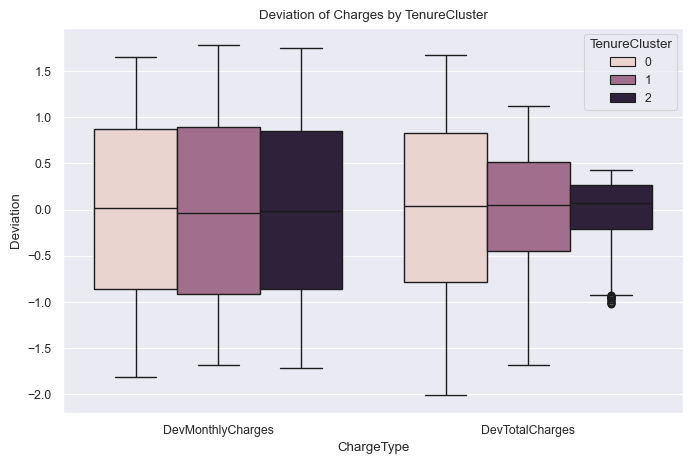

In [150]:
df_melted = X_transformed.melt(
    id_vars=['TenureCluster'], 
    value_vars=['DevMonthlyCharges', 'DevTotalCharges'],
    var_name='ChargeType', 
    value_name='Deviation'
)

plt.figure(figsize=(8,5))
sns.boxplot(
    x='ChargeType', 
    y='Deviation', 
    hue='TenureCluster', 
    data=df_melted
)
plt.title("Deviation of Charges by TenureCluster")
plt.show()

#### Churn rate by tenure, service type, or monthly charges

In [152]:
X_transformed['SeniorWithDependents'] = (
    (X_transformed['SeniorCitizen'] == 1) & 
    (X_transformed['Dependents'] == 1)
).astype(int)

X_transformed['SeniorAlone'] = (
    (X_transformed['SeniorCitizen'] == 1) & 
    (X_transformed['Partner'] == 0) & 
    (X_transformed['Dependents'] == 0)
).astype(int)

X_transformed['YoungSingle'] = (
    (X_transformed['SeniorCitizen'] == 0) & 
    (X_transformed['Partner'] == 0) & 
    (X_transformed['Dependents'] == 0)
).astype(int)

X_transformed['CoupleNoKids'] = (
    (X_transformed['Partner'] == 1) & 
    (X_transformed['Dependents'] == 0)
).astype(int)

X_transformed['FamilyCustomer'] = (
    (X_transformed['Partner'] == 1) & 
    (X_transformed['Dependents'] == 1)
).astype(int)

X_transformed['SingleParent'] = (
    (X_transformed['Partner'] == 0) & 
    (X_transformed['Dependents'] == 1)
).astype(int)

### Filter Features

There two points to keep in mind here,
* Keep only the impactful features
* Avoid Multicollinearity (due to Logistic Regression)

In [154]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_transformed, y_coded)

importances = pd.Series(model.feature_importances_, index=X_transformed.columns)
print(importances.sort_values(ascending=False))

DevMonthlyCharges              0.173087
MonthlyCharges                 0.172529
TotalCharges                   0.171031
DevTotalCharges                0.168890
Tenure                         0.127944
Contract                       0.033466
IsMale                         0.023980
InternetService_DSL            0.013638
InternetService_Fiber optic    0.013494
PhoneService                   0.012621
SeniorCitizen                  0.012085
InternetService_No             0.010439
CoupleNoKids                   0.008244
Partner                        0.008104
YoungSingle                    0.007912
Dependents                     0.007076
SingleParent                   0.006124
AvgMonthlyCharges              0.005432
AvgTotalCharges                0.005395
TenureCluster                  0.005187
FamilyCustomer                 0.004802
SeniorWithDependents           0.004319
SeniorAlone                    0.004199
dtype: float64


In [155]:
low_importance_features = importances[importances < 0.006].index.tolist()

X_transformed = X_transformed.drop(columns=low_importance_features)
print("Dropped Features:", low_importance_features)

Dropped Features: ['TenureCluster', 'AvgMonthlyCharges', 'AvgTotalCharges', 'SeniorWithDependents', 'SeniorAlone', 'FamilyCustomer']


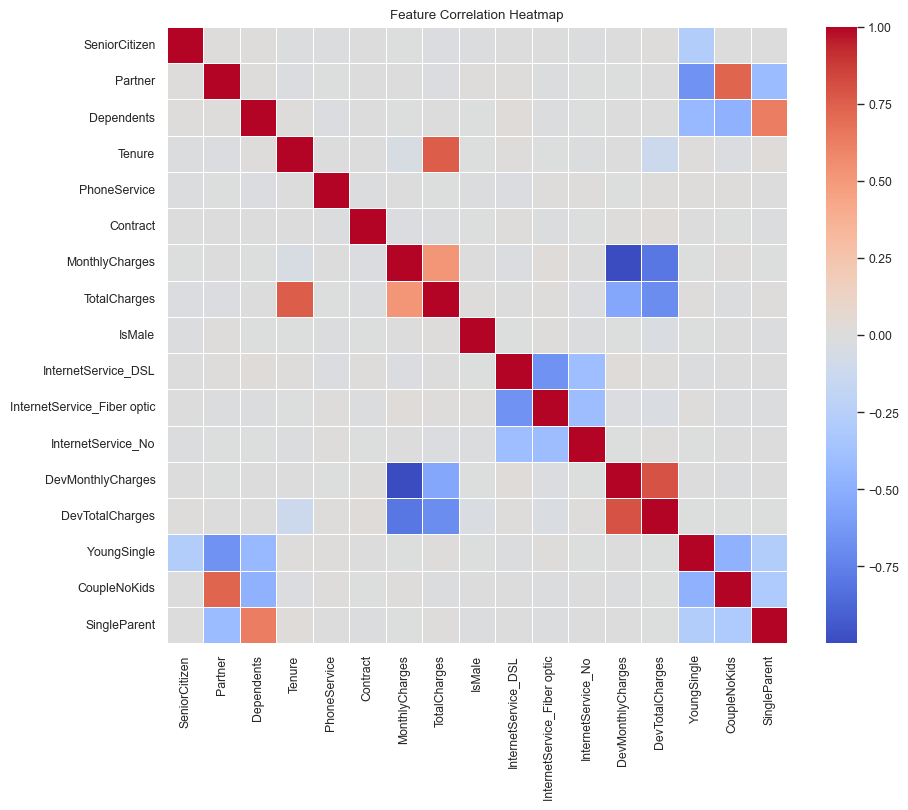

In [156]:
corr_matrix = X_transformed.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [157]:
high_corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)
high_corr_pairs = high_corr_pairs[high_corr_pairs != 1] 

high_corr_pairs = high_corr_pairs[high_corr_pairs > 0.85]
print(high_corr_pairs)

DevMonthlyCharges  MonthlyCharges       0.99846
MonthlyCharges     DevMonthlyCharges    0.99846
dtype: float64


In [158]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_transformed, y_coded)

importances = pd.Series(model.feature_importances_, index=X_transformed.columns)
print(importances.sort_values(ascending=False))

DevMonthlyCharges              0.177564
DevTotalCharges                0.177250
MonthlyCharges                 0.175072
TotalCharges                   0.174655
Tenure                         0.127922
Contract                       0.031459
IsMale                         0.022064
SeniorCitizen                  0.015171
InternetService_DSL            0.013809
InternetService_Fiber optic    0.013139
PhoneService                   0.011812
Partner                        0.011215
Dependents                     0.010456
CoupleNoKids                   0.010371
InternetService_No             0.010355
YoungSingle                    0.010179
SingleParent                   0.007506
dtype: float64


Between `MonthlyCharges` and `DevMonthlyCharges`, let's drop `Monthly Charges` because it's less important in our RandomForestClassifier model.

In [160]:
df_coded.drop(columns="MonthlyCharges", inplace=True)

In [196]:
import pickle

def feature_engineering(X, transformer):
    # If aggregated mean is given, if not compute for it
    cluster_means = transformer.cluster_means
    if not (cluster_means):
        with open('kmeans_tenure_cluster_model.pkl', 'rb') as f:
            kmeans_final = pickle.load(f)
        
        labels = kmeans_final.predict(X[['Tenure']])
        
        X['TenureCluster'] = labels
    
        cluster_means = (
            X.groupby("TenureCluster")[['MonthlyCharges', 'TotalCharges']]
            .mean()
            .rename(columns={"MonthlyCharges": "AvgMonthlyCharges", 
                            "TotalCharges" : "AvgTotalCharges"})
                            )
        
        X = X.merge(cluster_means, how='left', left_on='TenureCluster', right_index=True)
        X['DevMonthlyCharges'] =  X['AvgMonthlyCharges'] - X['MonthlyCharges']
        X['DevTotalCharges'] = X['AvgTotalCharges'] - X['TotalCharges']


    X['YoungSingle'] = (
        (X['SeniorCitizen'] == 0) & 
        (X['Partner'] == 0) & 
        (X['Dependents'] == 0)
    ).astype(int)

    X['CoupleNoKids'] = (
        (X['Partner'] == 1) & 
        (X['Dependents'] == 0)
    ).astype(int)

    X['SingleParent'] = (
        (X['Partner'] == 0) & 
        (X['Dependents'] == 1)
    ).astype(int)

    X.drop(columns=['TenureCluster',
                    'AvgMonthlyCharges', 
                    'AvgTotalCharges', 
                    'MonthlyCharges'], inplace=True)
    
    return X

@add_transformations(codify, standardized, feature_engineering)
class CustomTransformer(BaseEstimator, TransformerMixin):
    def __init__(self,
                 cols_to_stdize=['Tenure', 'MonthlyCharges', 'TotalCharges'], 
                cluster_means=None):
        self.cols_to_stdize = cols_to_stdize
        self.cluster_means= cluster_means
        
    def fit(self, X, y=None):
        return self

final = CustomTransformer()

final.fit(X, y)

X_transformed = final.transform(X)

### Final Dataset

In [79]:
X_train_final = X_transformed.copy()
y_train_final = y_coded.copy()

df_final = pd.concat([X_train_final, y_train_final], axis=1)
df_final.head()

,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,Contract,TotalCharges,IsMale,InternetService_DSL,InternetService_Fiber optic,InternetService_No,DevMonthlyCharges,DevTotalCharges,YoungSingle,CoupleNoKids,SingleParent,Churn
CustomerID,,,,,,,,,,,,,,,,,
CUST00001,0,0,0,1.452599,1,0,-0.618127,1,0,1,0,1.649536,1.476208,1,0,0,0
CUST00002,0,0,0,-0.434474,1,0,-0.401054,1,0,1,0,0.217012,0.433466,1,0,0,0
CUST00003,0,1,0,0.920347,1,0,0.139008,1,0,1,0,0.633219,0.719072,0,1,0,0
CUST00004,0,1,1,1.694531,1,1,-0.129236,0,1,0,0,1.263308,0.987316,0,0,0,0
CUST00005,0,0,0,0.871961,1,0,1.714463,1,1,0,0,-1.253929,-0.856383,1,0,0,1


### Review
Here are some key takeaways from the EDA:
* **Imbalanced Distribution** - we have an imbalanced distribution between positve class Churn=Yes and negative class Churn=No with about 7:3 proportion in favor of positive class. This is also true for each inner group under features (like Male and Female in `Gender`). This is problemeatic for multiple reasons, reasons that will be described in the next section.
* **Outliers** - 0.72% of the data are outliers (based on IQR method) under the `TotalCharges`
* **Tenure Cluster** - we have also used KNN to provide us some insights to the possible groupings in terms of `Tenure`. The result showed that the optimal number of clusters is 3.
* **Feature Engineering** - we added some features by combining and aggregating from existing features like demographics and the clusters themselves. By the end we choose the most relavant features by conducting Random Forest Classification and producing correlatonal matrix to filter out the irrelevant features.

## Unit 2: Tuning Predictive Models

### Transform Test

In [220]:
from sklearn.model_selection import train_test_split

y_test_final = y_test.map({"No": 0, "Yes": 1})

transformer = CustomTransformer()
transformer.fit(X_test, y_test)
X_test_final = transformer.transform(X_test)

X_test_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1986 entries, CUST02699 to CUST06434
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SeniorCitizen                1986 non-null   int64  
 1   Partner                      1986 non-null   int64  
 2   Dependents                   1986 non-null   int64  
 3   Tenure                       1986 non-null   float64
 4   PhoneService                 1986 non-null   int64  
 5   Contract                     1986 non-null   int64  
 6   TotalCharges                 1986 non-null   float64
 7   IsMale                       1986 non-null   int64  
 8   InternetService_DSL          1986 non-null   int32  
 9   InternetService_Fiber optic  1986 non-null   int32  
 10  InternetService_No           1986 non-null   int32  
 11  DevMonthlyCharges            1986 non-null   float64
 12  DevTotalCharges              1986 non-null   float64
 13  YoungSingl

### Resampling

Our dataset shows imbalanced distribution between positve class `Churn=Yes` and negative class `Churn=No` with about 7:3 proportion in favor of positive class. For that reason, resampling is imperative we don't want our model to become overly favor the majority class. When that happens, our model will loose its predictive power. It also becomes problematic because a model that predicts every input as a majority class will automatically achieve 70% accuracy. But this isn't ideal eighther because we don't want a baseline model, we want to juice out the information/feature that impacts the output/response, even at the cost of accuracy. 

Now the question is two-fold:
* What's the other alternative for accuracy? In our specific case, we can resorrt to either *precision*, *recall*, or *f1* score. Higher recall means our model performs better at finding positive classes, this makes the said model favor the positive class in exhcange for being right. Precision on the other hand values being right. This has a more careful in labeling positive classes even at the exchange wrongly labeling a data point as negative class even if it should belong to positive class (type 2 error). In the context of business, we favor precision if the cost of corresponding actions to the positive class is high. For example if we will launch a discount campaign for those who are more prone to churn. However, we favor recall metric if we want to label as many (and smartly) as we can all because the cost for doing isn't too much. Then there's F1 that's a balance between the two. We'll choose F1 as a the safer option for our gridsearch later.

* What's the best resampling method? The most basic ones are undersampling and oversampling, but we can also use other resampling method. I've already done my due diligence behind the scene to test different resampling method. I have found that `SMOTETomek` method to be the best method. Of course we are gonna test it out later.

In [218]:
import warnings
warnings.filterwarnings('ignore')


from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train_final, y_train_final)

from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train_final, y_train_final)

print(f"Original class distribution: {np.bincount(y_train_final)}")
print(f"Resampled class distribution (Oversampling): {np.bincount(y_train_over)}")
print(f"Resampled class distribution (Undersampling): {np.bincount(y_train_under)}")

Original class distribution: [7237 2691]
Resampled class distribution (Oversampling): [7237 7237]
Resampled class distribution (Undersampling): [2691 2691]


In [216]:
from imblearn.combine import SMOTETomek

def apply_smote_tomek_resampling(X_train, y_train, random_state=42):
    smote_tomek = SMOTETomek(random_state=random_state)
    X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)
    
    print("Class distribution before resampling:", np.bincount(y_train))
    print("Class distribution after resampling:", np.bincount(y_resampled))
    
    return X_resampled, y_resampled

X_train_resampled, y_train_resampled = apply_smote_tomek_resampling(X_train_final, y_train_final)

Class distribution before resampling: [7237 2691]
Class distribution after resampling: [6411 6411]


### Baseline

In [224]:
baseline = y_coded.value_counts(normalize=True, ascending=False).iloc[0]
print("Baseline:", baseline)

Baseline: 0.7289484286865431



### Model Complexity

#### Fit a decision tree and logistic regression model.

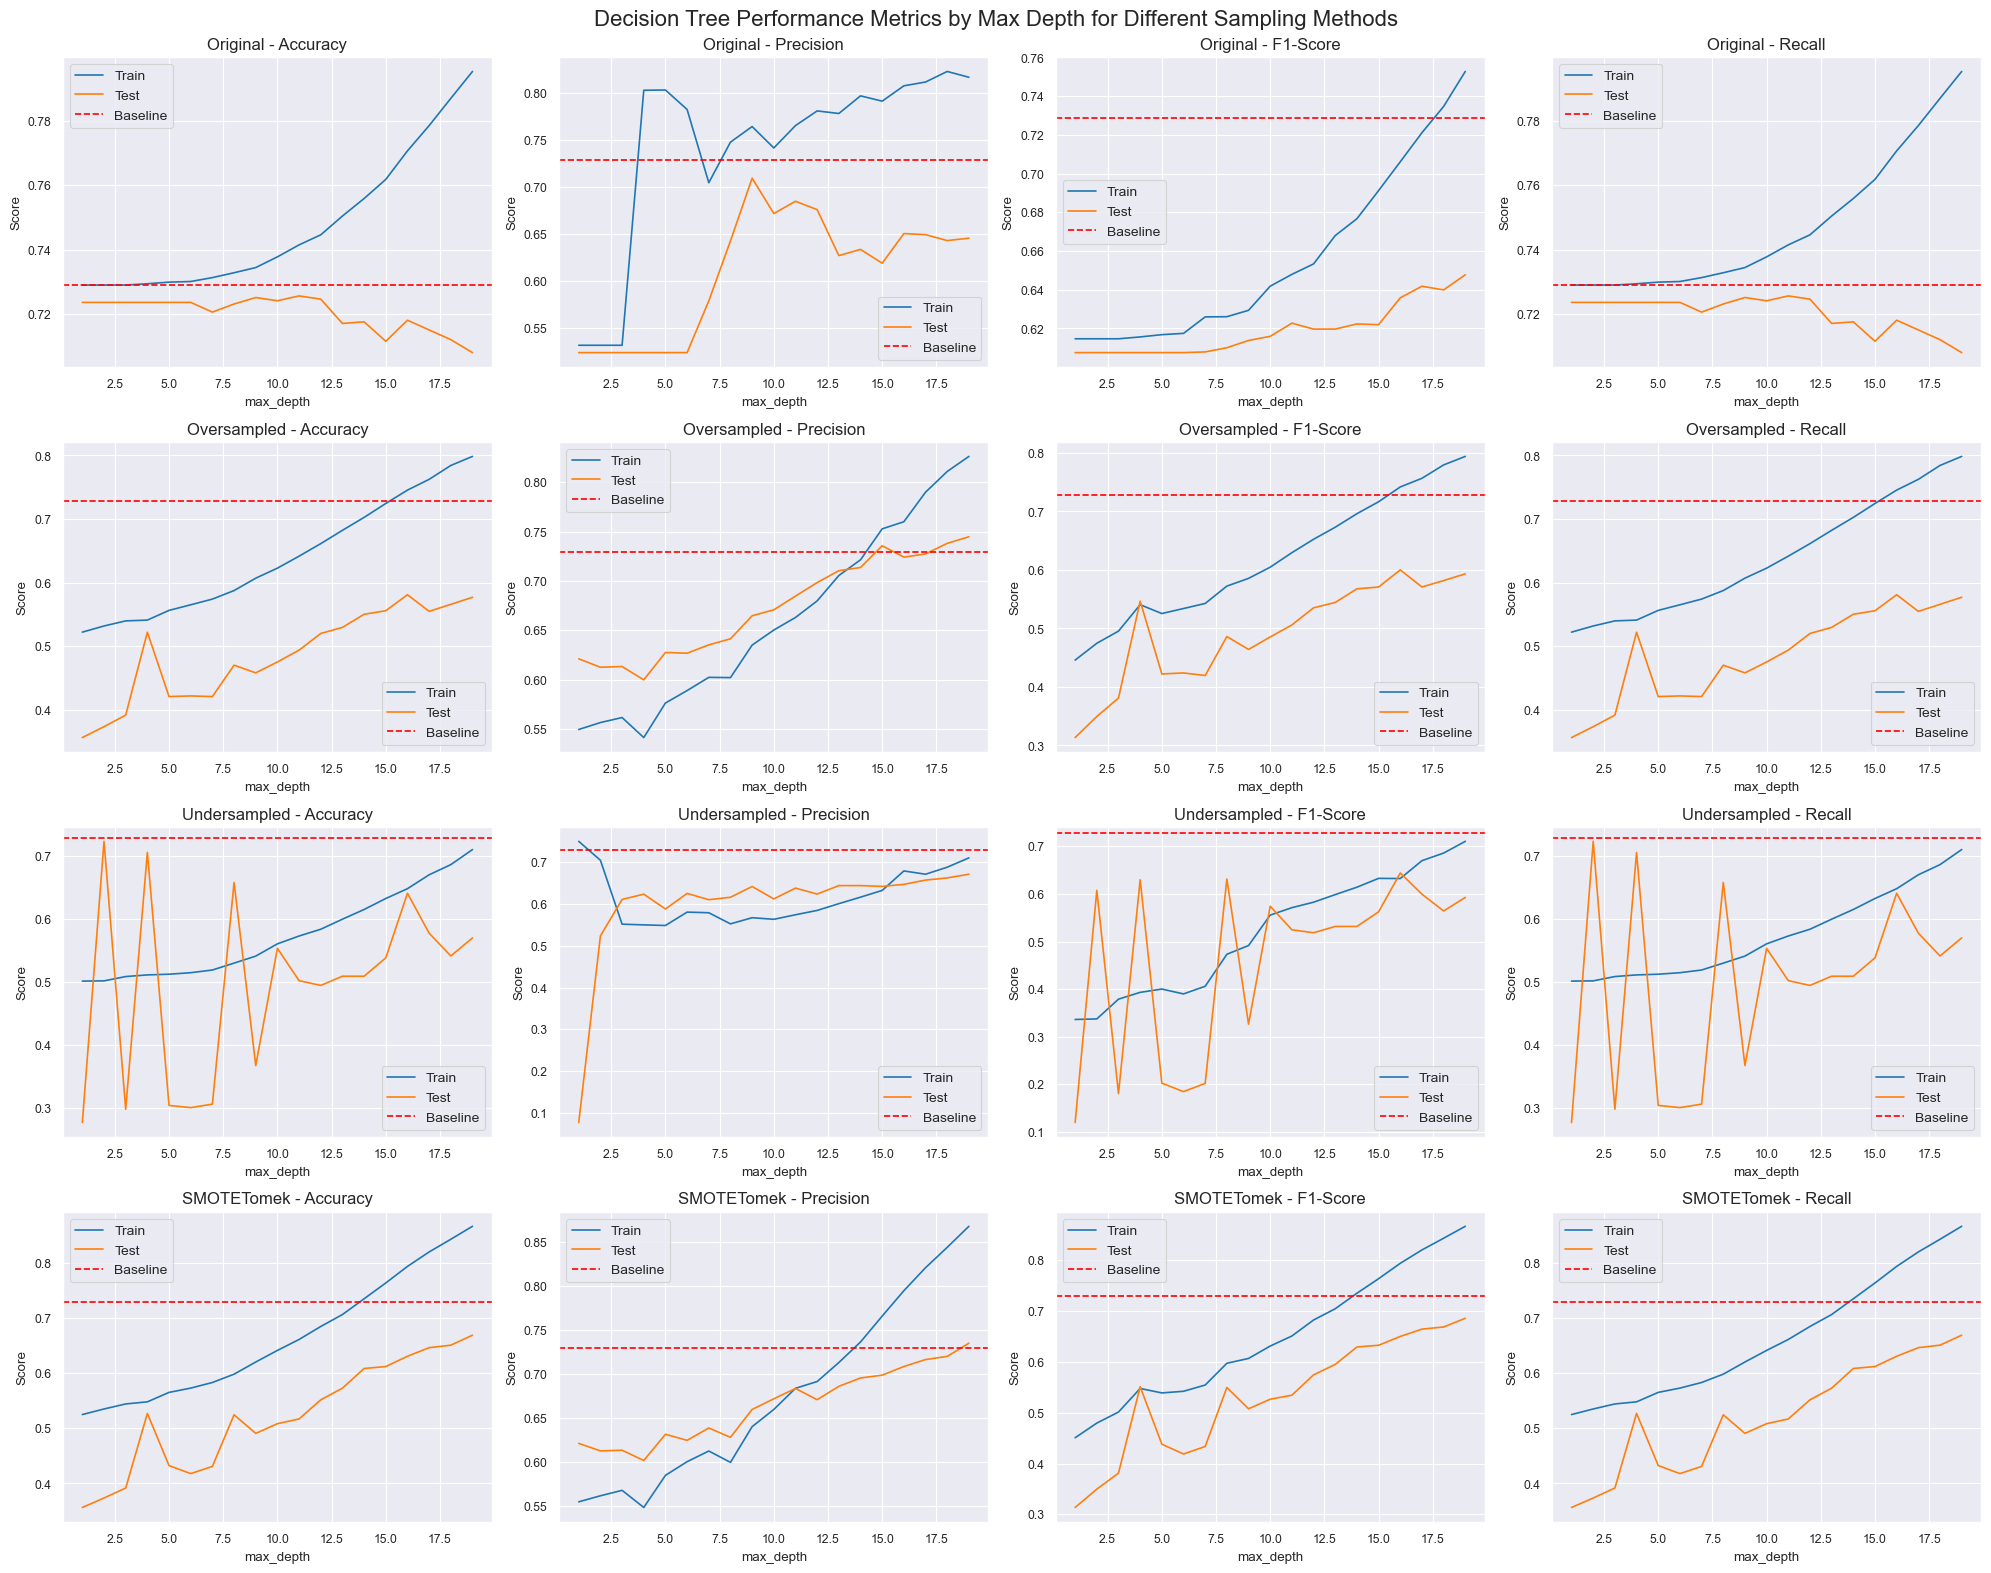

In [226]:
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score
from sklearn.tree import DecisionTreeClassifier

fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(20, 16))

dataset = [[X_train_final, y_train_final], [X_train_over, y_train_over], 
           [X_train_under, y_train_under], [X_train_resampled, y_train_resampled]]
title = ['Original', 'Oversampled', 'Undersampled', 'SMOTETomek']
upto = 20


metrics = ['Accuracy', 'Precision', 'F1-Score', 'recall']

for i in range(4):
    data = dataset[i]
    
    # Initialize lists to store metrics
    train_accuracy = []
    test_accuracy = []
    train_precision = []
    test_precision = []
    train_f1 = []
    test_f1 = []
    train_recall = []
    test_recall = []
    
    # Train models with different max_depth values
    for k in range(1, upto):
        decision_tree = DecisionTreeClassifier(max_depth=k, random_state=42)
        decision_tree.fit(data[0], data[1])
        
        # Make predictions
        y_train_pred = decision_tree.predict(data[0])
        y_test_pred = decision_tree.predict(X_test_final)
        
        # accuracy
        train_accuracy.append(accuracy_score(data[1], y_train_pred))
        test_accuracy.append(accuracy_score(y_test_final, y_test_pred))
        
        # precision
        train_precision.append(precision_score(data[1], y_train_pred, average='weighted', zero_division=0))
        test_precision.append(precision_score(y_test_final, y_test_pred, average='weighted', zero_division=0))
        
        # F1 
        train_f1.append(f1_score(data[1], y_train_pred, average='weighted'))
        test_f1.append(f1_score(y_test_final, y_test_pred, average='weighted'))

        train_recall.append(recall_score(data[1], y_train_pred, average='weighted'))
        test_recall.append(recall_score(y_test_final, y_test_pred, average='weighted'))

    # all metrics
    df_scores = pd.DataFrame({
        "max_depth": list(range(1, upto)),
        "train_accuracy": train_accuracy,
        "test_accuracy": test_accuracy,
        "train_precision": train_precision,
        "test_precision": test_precision,
        "train_f1": train_f1,
        "test_f1": test_f1,
        "train_recall" : train_recall,
        "test_recall" : test_recall
    })
    
    # Accuracy
    sns.lineplot(data=df_scores, x="max_depth", y="train_accuracy", label="Train", ax=ax[i, 0])
    sns.lineplot(data=df_scores, x="max_depth", y="test_accuracy", label="Test", ax=ax[i, 0])
    ax[i, 0].set_title(f"{title[i]} - Accuracy", fontsize=12)
    ax[i, 0].axhline(y=baseline, color='r', linestyle='--', label="Baseline")
    ax[i, 0].set_ylabel("Score")
    ax[i, 0].legend(fontsize=10)
    
    # Precision
    sns.lineplot(data=df_scores, x="max_depth", y="train_precision", label="Train", ax=ax[i, 1])
    sns.lineplot(data=df_scores, x="max_depth", y="test_precision", label="Test", ax=ax[i, 1])
    ax[i, 1].set_title(f"{title[i]} - Precision", fontsize=12)
    ax[i, 1].axhline(y=baseline, color='r', linestyle='--', label="Baseline")
    ax[i, 1].set_ylabel("Score")
    ax[i, 1].legend(fontsize=10)
    
    # F1-Score
    sns.lineplot(data=df_scores, x="max_depth", y="train_f1", label="Train", ax=ax[i, 2])
    sns.lineplot(data=df_scores, x="max_depth", y="test_f1", label="Test", ax=ax[i, 2])
    ax[i, 2].set_title(f"{title[i]} - F1-Score", fontsize=12)
    ax[i, 2].axhline(y=baseline, color='r', linestyle='--', label="Baseline")
    ax[i, 2].set_ylabel("Score")
    ax[i, 2].legend(fontsize=10)

    # Recall
    sns.lineplot(data=df_scores, x="max_depth", y="train_recall", label="Train", ax=ax[i, 3])
    sns.lineplot(data=df_scores, x="max_depth", y="test_recall", label="Test", ax=ax[i, 3])
    ax[i, 3].set_title(f"{title[i]} - Recall", fontsize=12)
    ax[i, 3].axhline(y=baseline, color='r', linestyle='--', label="Baseline")
    ax[i, 3].set_ylabel("Score")
    ax[i, 3].legend(fontsize=10)

plt.suptitle("Decision Tree Performance Metrics by Max Depth for Different Sampling Methods", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

Each figure above shows the distribution of Specified Scoring metric as a function of `max_depth` parameter in decision tree. Both the `Oversampling` and `SMOTETomek` resampling method got the best scores accross all scoring metrics. `Oversampling` performs best at *precision* metrics while `SMOTETomek` performs best across all metrics. So it appears that `SMOTETomek` is the best sampling method for given our data and the usage of decision tree model.

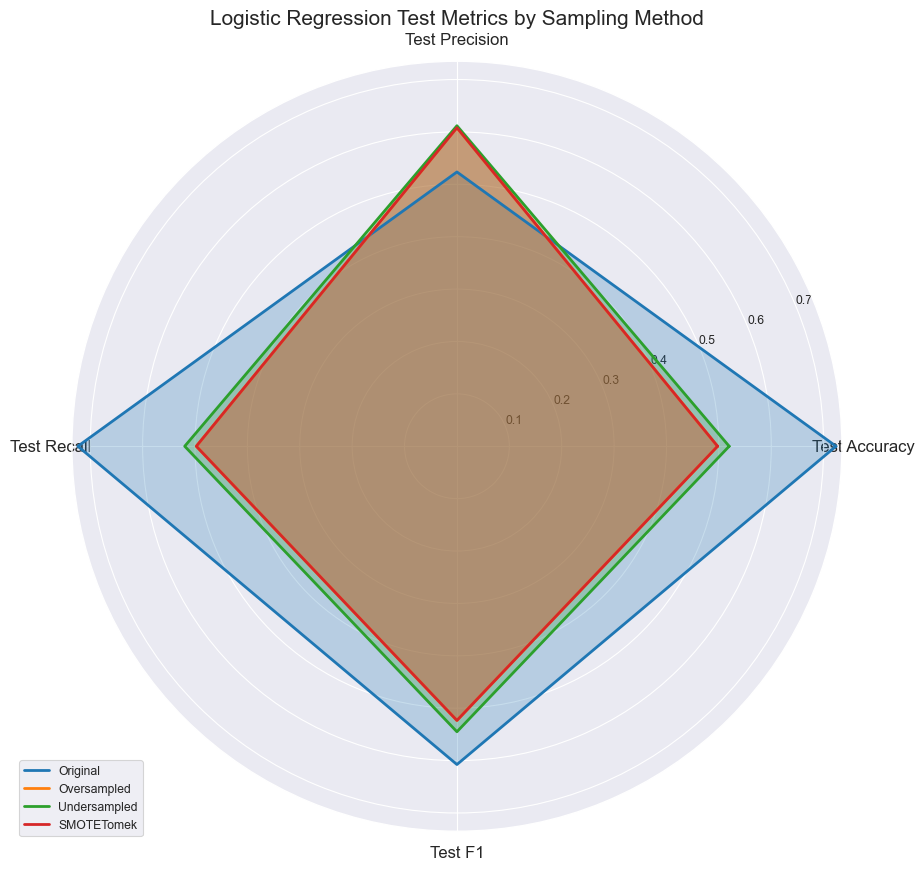

In [56]:
from sklearn.linear_model import LogisticRegression

results = []

for i in range(4):
    data = dataset[i]
    
    log_reg = LogisticRegression(max_iter=1000, random_state=42).fit(data[0], data[1])
    
    y_train_pred = log_reg.predict(data[0])
    y_test_pred = log_reg.predict(X_test_final)
    
    train_acc = log_reg.score(data[0], data[1])
    test_acc = log_reg.score(X_test_final, y_test_final)
    train_precision = precision_score(data[1], y_train_pred, average='weighted', zero_division=0)
    test_precision = precision_score(y_test_final, y_test_pred, average='weighted', zero_division=0)
    train_recall = recall_score(data[1], y_train_pred, average='weighted')
    test_recall = recall_score(y_test_final, y_test_pred, average='weighted')
    train_f1 = f1_score(data[1], y_train_pred, average='weighted')
    test_f1 = f1_score(y_test_final, y_test_pred, average='weighted')
    
    
    results.append({
        'Sampling Method': title[i],
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Train Precision': train_precision,
        'Test Precision': test_precision,
        'Train Recall': train_recall,
        'Test Recall': test_recall,
        'Train F1': train_f1,
        'Test F1': test_f1
    })

results_df = pd.DataFrame(results)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, polar=True)

test_metrics = ['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1']

radar_df = results_df.set_index('Sampling Method')[test_metrics]
angles = np.linspace(0, 2*np.pi, len(test_metrics), endpoint=False).tolist()
angles += angles[:1] 

plt.xticks(angles[:-1], test_metrics, fontsize=12)

for i, method in enumerate(title):
    values = radar_df.loc[method].values.flatten().tolist()
    values += values[:1] 
    ax.plot(angles, values, linewidth=2, label=method)
    ax.fill(angles, values, alpha=0.25)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Logistic Regression Test Metrics by Sampling Method', fontsize=15)
plt.show()

Looks like the Logistic Regression with Original dataset performs extremely well in the accuracy and recall metrics. This is to be expected because of the imbalance of the data. The precision takes toll in the process (as was evidenced by the low precision of the original dataset). Also, it appears that undersampling works well with logistic regression! We should keep this in mind for later.

#### Compare their complexities and explain trade-offs.
The difference between the assumptions that makes up logistic regression and decisions trees.

**Logistic regression** assumes linearity. This means that the the response/dependent variable is just a linear combinations of each features (which are assumed to independent of each other). This approach is simple and quick to train. Due to that, it's strenght lies in its result's interpretability. But sometimes, it oversimplifes the data which might lead to failing to generalize the model well because we are missing out on important relationship between features that might be significant to predictor. This is called *Underfitting*. 

**Decision Trees** are the opposite, decision trees assumes no form. It basically starts at the top and dig deeper until all the variances in the training data could be explained. This isn't ideal also because we are also caputuring the noises in our training data along with the essential information. This will also fail to generalize the model well because we became just memorized the training data and wouldn't do well with outside data. It's like memorizing the answers to all questions in an exam and getting a perfect score. But without understanding the actual concent of the topics asked in exams, we wouldn't do well with other sets of questions. This is called *Overfitting*.

But that is not to say that we couldn't use either the logitic regression and decision trees anymore. In fact we could use these models on most of the simple cases. So long as we checked the assumptions (non multicollinearty of features in logistic regression) and have set the correct hyper parameter (like the max-depth in decisions trees), we would be fine. Neither of them are good or bad, they just have each of their own strenghts and limitations.

#### Bias-Variance Trade-Off
We can think of Bias-Variance trade off as a game of *tag of war*. They constantly pull each other, when one is too strong, the opposite will be pulled towards the other side helplessly. High **Bias** happens when we became too rigid with the assumptions of the shapes of the model, like the linearity in *Logistic regression*. High **variance happens** when we became too flexible with our model, like that of **Decision Tree** with assuming *max_depth*. As was explained earlier, too much of both worlds could be detrimental to the model's performance. We don't want neither side to dominate, because then the game of *tug of war* will end (and so the collapse of our model). And so it is in the best interest of each analyst to find the compromise between the two worlds that makes the *rope stable, balanced, and reliable*, prolonging the game for as long as possible.

### Cross-Validation

In [234]:
from prettytable import PrettyTable
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)

for i in range(4):
    #skip oversampling and undersampling
    if i in [1,2]:
        continue
    data = dataset[i]
    y_pred_cv = cross_val_predict(log_reg, data[0], data[1], cv=10, n_jobs=-1)
    accuracy = accuracy_score(data[1], y_pred_cv)
    report_dict = classification_report(data[1], y_pred_cv, output_dict=True, zero_division=0)
    
    table = PrettyTable()
    table.field_names = ["Class", "Precision", "Recall", "F1-Score", "Support"]

    for label, metrics in report_dict.items():
        if isinstance(metrics, dict):
            table.add_row([label, round(metrics["precision"], 2), round(metrics["recall"], 2), round(metrics["f1-score"], 2), int(metrics["support"])])
    print(f"Classification Report ({title[i]})")
    print(f"Accuracy for {title[i]}: {accuracy:.2f}")
    print(table)
    print("")


Classification Report (Original)
Accuracy for Original: 0.73
+--------------+-----------+--------+----------+---------+
|    Class     | Precision | Recall | F1-Score | Support |
+--------------+-----------+--------+----------+---------+
|      0       |    0.73   |  1.0   |   0.84   |   7237  |
|      1       |    0.0    |  0.0   |   0.0    |   2691  |
|  macro avg   |    0.36   |  0.5   |   0.42   |   9928  |
| weighted avg |    0.53   |  0.73  |   0.61   |   9928  |
+--------------+-----------+--------+----------+---------+

Classification Report (SMOTETomek)
Accuracy for SMOTETomek: 0.54
+--------------+-----------+--------+----------+---------+
|    Class     | Precision | Recall | F1-Score | Support |
+--------------+-----------+--------+----------+---------+
|      0       |    0.54   |  0.49  |   0.52   |   6411  |
|      1       |    0.54   |  0.59  |   0.56   |   6411  |
|  macro avg   |    0.54   |  0.54  |   0.54   |  12822  |
| weighted avg |    0.54   |  0.54  |   0.54   

### Classification Report Interpretation

**Original Dataset**
* Accuracy: 0.73
* Precision: Class 0 (0.73), Class 1 (0.0), Macro avg (0.36)
* Recall: Class 0 (1.0), Class 1 (0.0), Macro avg (0.5)
* F1-Score: Class 0 (0.84), Class 1 (0.0), Macro avg (0.42)

**SMOTE Dataset**
* Accuracy: Approximately 0.54
* Precision: Class 0 (0.54), Class 1 (0.54), Macro avg (0.54)
* Recall: Class 0 (0.49), Class 1 (0.59), Macro avg (0.54)
* F1-Score: Class 0 (0.52), Class 1 (0.56), Macro avg (0.54)

Looking at the model that was trained under the original dataset, we see the classic manifestation/effect of class imbalance. The model achieves perfect recall for Class 0 but at what cost? Complete blindness to Class 1, as evidenced by the zeros across all metrics for this class. This is a  limitation of the model when faced with imbalanced data.

The SMOTE-enhanced cross-validated model presents a more balanced approach. The metrics might appear numerically lower at first glance (around 0.54 across the board), but this actually represents a compromise in the bias-variance trade-off. We've sacrificed some performance on the dominant class to achieve meaningful predictions on both classes.

### Classification
#### Train a Random Forest classifier to predict customer churn.
#### Tune hyperparameters using grid search.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rand_forest = RandomForestClassifier(random_state=42)

params = {
    "n_estimators": [100, 200, 300, 400],
    "max_depth": [6, 10, 15, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ['sqrt', 'log2'],
    "bootstrap": [True, False],
    "criterion": ['gini', 'entropy']
}

model = GridSearchCV(rand_forest, param_grid=params,scoring="f1", cv=5, n_jobs=-1, verbose=2)
model.fit(X_train_resampled, y_train_resampled)
results = pd.DataFrame(model.cv_results_)
model.best_params_

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

#### Report final model performance.

In [ ]:
best_rand_for = model.best_estimator_
y_pred_cv = cross_val_predict(best_rand_for, X_train_resampled, y_train_resampled, cv=10, n_jobs=-1)
print(classification_report(y_train_resampled, y_pred_cv))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78      6411
           1       0.78      0.80      0.79      6411

    accuracy                           0.79     12822
   macro avg       0.79      0.79      0.79     12822
weighted avg       0.79      0.79      0.79     12822



In [ ]:
best_rand_for = model.best_estimator_

best_rand_for.fit(X_train_resampled, y_train_resampled)

y_pred = best_rand_for.predict(X_train_resampled)
y_pred_test = best_rand_for.predict(X_test_final)
print("Baseline:", baseline)
print("Random Forest Train F1:", f1_score(y_train_resampled, y_pred, average='weighted'))
print("Random Forest Test F1:", f1_score(y_test_final, y_pred_test, average='weighted'))

Baseline: 0.7235649546827795
Random Forest Train F1: 1.0
Random Forest Test F1: 0.878822703280329


In [ ]:
print("Random Forest Train Accuracy:", accuracy_score(y_train_resampled, y_pred))
print("Random Forest Test Accuracy:", accuracy_score(y_test_final, y_pred_test))

Random Forest Train Accuracy: 1.0
Random Forest Test Accuracy: 0.8761329305135952


Well that turn out better than I expected!!! I'm kinda suspicious with the result so let's examine further.

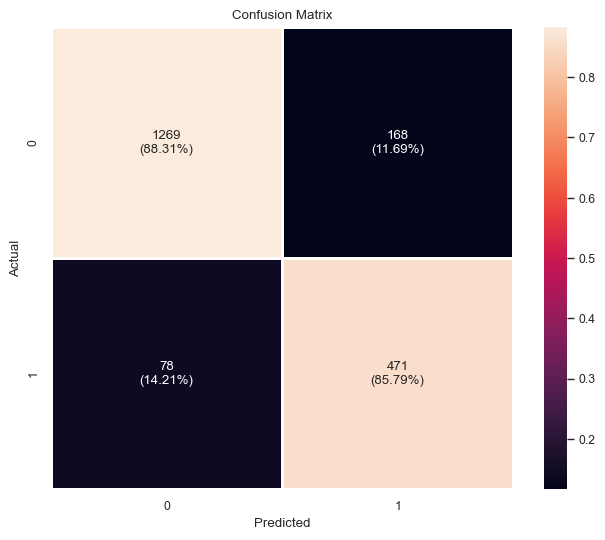

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_final, y_pred_test)

cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

labels = np.asarray([
    [f"{v}\n({p:.2%})" for v, p in zip(row_raw, row_norm)]
    for row_raw, row_norm in zip(cm, cmn)
])

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cmn, annot=labels, fmt='', linewidths=1, square=True)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

The final random forest model demonstrates a strong performance:

Classifier : **Random Forest**

Hyper Parameters : 

    'bootstrap': False,

    'criterion': 'entropy',

    'max_depth': None,
    
    'max_features': 'sqrt',
    
    'min_samples_leaf': 1,
    
    'min_samples_split': 2,
    
    'n_estimators': 400
 

Cross-Validation Results:
* Class 0: Precision 0.80, Recall 0.77, F1-score 0.78
* Class 1: Precision 0.78, Recall 0.80, F1-score 0.79
* Overall accuracy: 0.79

Train vs Test Performance:
* Baseline F1-score: 0.723
* Random Forest Train F1-score: 1.0
* Random Forest Test F1-score: 0.879
* Train Accuracy: 1.0
* Test Accuracy: 0.876

Confusion Matrix Analysis:
* True Negatives: 1269 (88.31% of actual negatives)
* False Positives: 168 (11.69% of actual negatives)
* False Negatives: 78 (14.21% of actual positives)
* True Positives: 471 (85.79% of actual positives)

The Random Forest model demonstrates a strong perform

The Random Forest model demonstrates strong performance, with a significant improvement over the baseline accuracy (0.723 to 0.876; a 0.153 or 15.6% increase). The model achieves perfect training scores (1.0) for both f1 and accuracy, while maintaining strong test performance (0.876 accuracy and 0.879 in f1), suggesting some overfitting but not to a concerning degree.

The confusion matrix indicates robust classification capability for both classes, with slightly stronger performance for class 0 (88.31% of actual negatives correctly identified) compared to class 1 (85.79% of actual positives correctly identified). 

Overall, this model configuration with 400 estimators (increasing this could improve the model), entropy criterion, and no maximum depth constraint generalizes effectively to unseen data while maintaining good balance between precision and recall across both classes.

In [ ]:
import pickle

# Save the model
with open('final_forest.pkl', 'wb') as f:
    pickle.dump(best_rand_for, f)

---

## Logistic Regression

### Fit a logistic regression model using Churn as the dependent variable and `Tenure`, `MonthlyCharges`, and `TotalCharges` as independent variables.



In [185]:
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

features = ['Tenure', 'DevMonthlyCharges', 'TotalCharges']
target = "Churn"

X_train_sm = X_train_under[features].copy()
y_train_sm = y_train_under
X_test_sm = X_test_final[features].copy()
y_test_sm = y_test_final

X_train_sm = sm.add_constant(X_train_sm)
X_test_sm = sm.add_constant(X_test_sm)

# train
sm_model = sm.Logit(y_train_sm, X_train_sm)
sm_results = sm_model.fit(disp=0)

# predict
train_probs = sm_results.predict(X_train_sm)
test_probs = sm_results.predict(X_test_sm)

y_train_pred = (train_probs >= 0.5).astype(int)
y_test_pred = (test_probs >= 0.5).astype(int)

# metrics
train_acc = accuracy_score(y_train_sm, y_train_pred)
test_acc = accuracy_score(y_test_sm, y_test_pred)

train_precision = precision_score(y_train_sm, y_train_pred, average='weighted', zero_division=0)
test_precision = precision_score(y_test_sm, y_test_pred, average='weighted', zero_division=0)

train_recall = recall_score(y_train_sm, y_train_pred, average='weighted')
test_recall = recall_score(y_test_sm, y_test_pred, average='weighted')

train_f1 = f1_score(y_train_sm, y_train_pred, average='weighted')
test_f1 = f1_score(y_test_sm, y_test_pred, average='weighted')

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Training Precision: {train_precision:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Training Recall: {train_recall:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Training F1 Score: {train_f1:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")

print("\nStatistical Significance Summary:")
print(sm_results.summary())

print("\nCoefficients and P-values:")
print("Variable".ljust(20) + "Coefficient".ljust(15) + "P-value".ljust(15) + "Significant")
print("-" * 60)

for i, feature in enumerate(['const'] + features):
    print(feature.ljust(20) + 
          f"{sm_results.params.iloc[i]:.4f}".ljust(15) + 
          f"{sm_results.pvalues.iloc[i]:.4f}".ljust(15) + 
          ("Yes" if sm_results.pvalues.iloc[i] < 0.05 else "No"))


Training Accuracy: 0.5106
Test Accuracy: 0.5327
Training Precision: 0.5110
Test Precision: 0.5943
Training Recall: 0.5106
Test Recall: 0.5327
Training F1 Score: 0.5061
Test F1 Score: 0.5547

Statistical Significance Summary:
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 5382
Model:                          Logit   Df Residuals:                     5378
Method:                           MLE   Df Model:                            3
Date:                Sun, 16 Mar 2025   Pseudo R-squ.:               0.0003232
Time:                        05:38:37   Log-Likelihood:                -3729.3
converged:                       True   LL-Null:                       -3730.5
Covariance Type:            nonrobust   LLR p-value:                    0.4916
                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

### Interpret the coefficients and assess model significance using p-values.
This model performs poorly. Its accuracy is barely above random guessing (0.5), it has almost no explanatory power ($R^2 \approx 0$), and none of the predictors are statistically significant. The non-significant LLR p-value (0.4916) indicates the model isn't significantly better than an intercept-only model. The selected features (Tenure, DevMonthlyCharges, TotalCharges) are not effective predictors of customer churn in this dataset.

### Regrssion in High-Dimension
#### Curse of Dimensionality
When we deal with high-dimensional regression, we're basically opening a can of worms. The *curse of dimensionality* isn't just a fancy term - it's a real headache! As we add more dimensions, our data points become like strangers in a vast universe, so far apart that meaningful relationships become harder to detect.

Multicollinearity becomes almost inevitable. Our predictors start holding hands and moving together, making it nearly impossible to figure out which one is actually driving the changes we see. It's like trying to identify who ate the last cookie when all suspects have the exact same alibi!

Overfitting is another monster we have to battle because we have so many dimensions to the point that our model becomes like that student who memorized every single example in the textbook but freezes when given a slightly different problem. The model learns the noise along with the signal, becoming essentially a fancy lookup table rather than a reliable predictive model.

The computational demands are no joke either. Each dimension we add isn't just a linear increase in complexity - it's exponential! What once took minutes now takes hours or days, and that's assuming we have the computing resources to begin with.

#### (Possible) Solutions
Thankfully, we have weapons to fight back. Dimensionality reduction techniques like PCA compress our data while preserving its essence. Regularization methods such as Ridge and Lasso act as disciplinarians, restraining coefficient values or eliminating unnecessary features entirely. Feature selection approaches help us identify what truly matters, while ensemble methods like Random Forests combine multiple perspectives for better predictions.

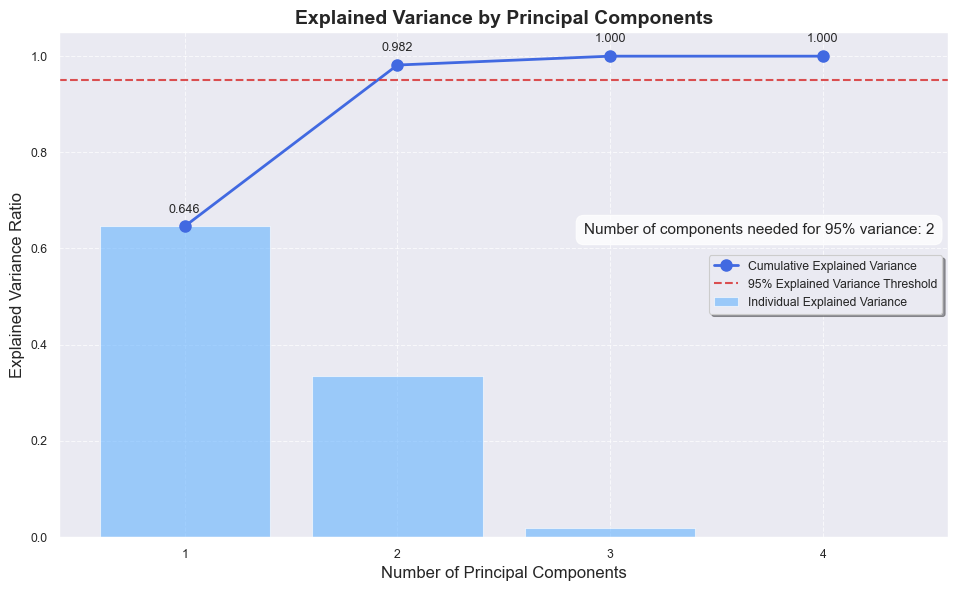

In [142]:
#compute for PCA
cov_mat = X_train_sm.cov().values
eig_val, eig_vec = np.linalg.eig(cov_mat)
index_eigh_val_desc = eig_val.argsort()[::-1]

#explained variance
sum = eig_val.sum()
explained_var_ratio = eig_val[index_eigh_val_desc] / sum
cum_explained_var = explained_var_ratio.cumsum()

plt.figure(figsize=(10, 6))

plt.plot(range(1, len(cum_explained_var)+1), cum_explained_var, 
         marker='o', linestyle='-', color='#4169E1', linewidth=2, 
         markersize=8, label='Cumulative Explained Variance')

plt.bar(range(1, len(explained_var_ratio)+1), explained_var_ratio, 
        alpha=0.6, color='#66b3ff', label='Individual Explained Variance')

plt.axhline(y=0.95, linestyle='--', color='#d62728', alpha=0.8, linewidth=1.5,
           label='95% Explained Variance Threshold')

plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Number of Principal Components', fontsize=12)
plt.ylabel('Explained Variance Ratio', fontsize=12)
plt.title('Explained Variance by Principal Components', fontsize=14, fontweight='bold')
plt.xticks(range(1, len(eig_val)+1))
plt.ylim([0, 1.05])

for i, txt in enumerate(np.round(cum_explained_var, decimals=3)):
    plt.annotate(f"{txt:.3f}", 
                 (i+1, cum_explained_var[i]), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center',
                 fontsize=9)

plt.legend(loc='right', frameon=True, shadow=True)

n_components_95 = np.argmax(cum_explained_var >= 0.95) + 1
plt.text(0.59, 0.6, f"Number of components needed for 95% variance: {n_components_95}",
         transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'),
         fontsize=11)

plt.tight_layout()
plt.show()

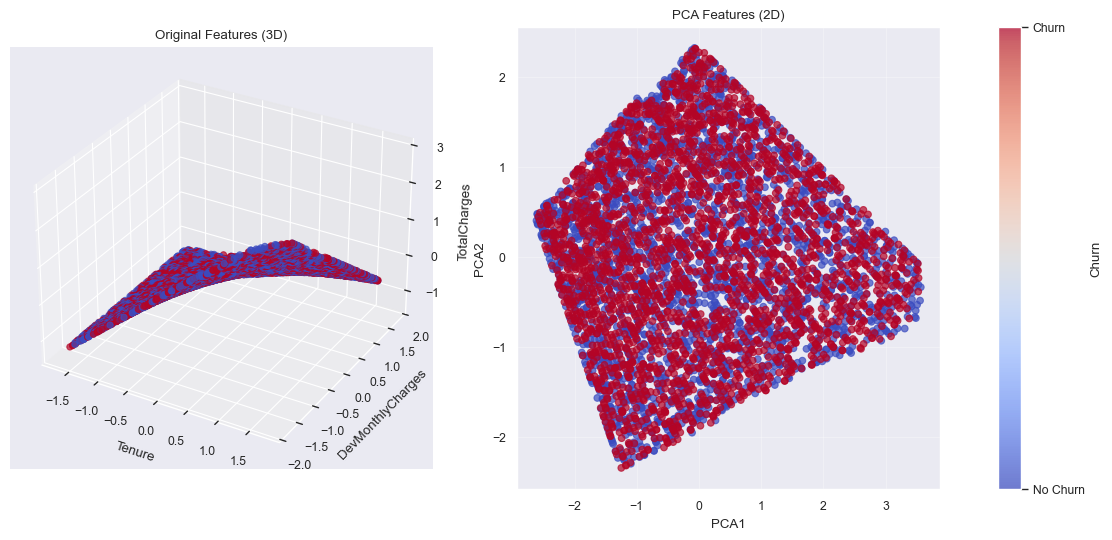

In [192]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

n = 2
eigenen_val, eigen_vec = eig_val[index_eigh_val_desc][:n], eig_vec[:,index_eigh_val_desc][:, :n]

pca_train = np.dot(X_train_sm, eigen_vec)
df_pca_train = pd.DataFrame(pca_train, columns=['PCA1', 'PCA2'])

orig_df = X_train_sm.copy()
orig_df['Churn'] = y_train_sm.values
df_pca_train['Churn'] = y_train_sm.values

fig = plt.figure(figsize=(15, 6))

ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(
    orig_df['Tenure'], 
    orig_df['DevMonthlyCharges'], 
    orig_df['TotalCharges'],
    c=orig_df['Churn'],
    cmap='coolwarm',
    alpha=0.7
)
ax1.set_xlabel('Tenure')
ax1.set_ylabel('DevMonthlyCharges')
ax1.set_zlabel('TotalCharges')
ax1.set_title('Original Features (3D)')

ax2 = fig.add_subplot(122)
scatter2 = ax2.scatter(
    df_pca_train['PCA1'],
    df_pca_train['PCA2'],
    c=df_pca_train['Churn'],
    cmap='coolwarm',
    alpha=0.7
)
ax2.set_xlabel('PCA1')
ax2.set_ylabel('PCA2')
ax2.set_title('PCA Features (2D)')
ax2.grid(True, alpha=0.3)

cbar = plt.colorbar(scatter1, ax=[ax1, ax2], label='Churn')
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['No Churn', 'Churn'])

plt.show()

### Ridge Regression

#### Implement Ridge Regression using Churn as the target variable and Tenure, MonthlyCharges, TotalCharges, and additional customer demographic features as predictors.



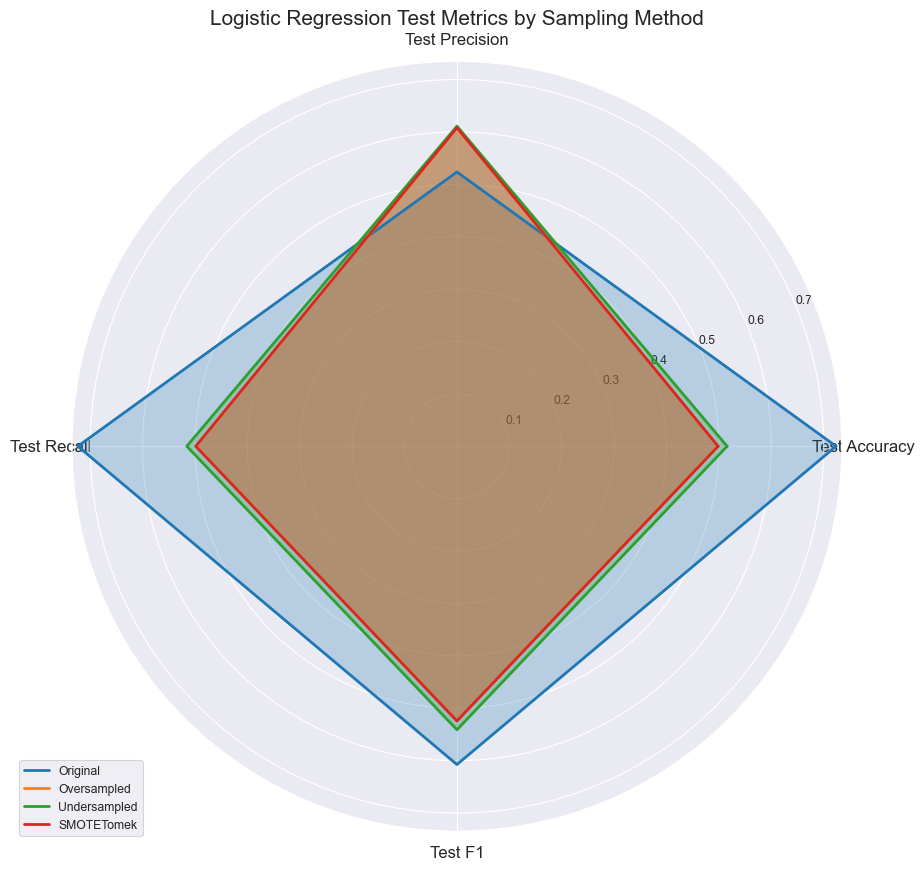

In [ ]:
from sklearn.linear_model import RidgeClassifier


dataset = [[X_train_final, y_train_final], [X_train_over, y_train_over], 
           [X_train_under, y_train_under], [X_train_resampled, y_train_resampled]]
title = ['Original', 'Oversampled', 'Undersampled', 'SMOTETomek']

results = []

for i in range(4):
    data = dataset[i]
    
    ridge_reg = RidgeClassifier().fit(data[0], data[1])

    y_train_pred = ridge_reg.predict(data[0])
    y_test_pred = ridge_reg.predict(X_test_final)
    
    train_acc = ridge_reg.score(data[0], data[1])
    test_acc = ridge_reg.score(X_test_final, y_test_final)
    train_precision = precision_score(data[1], y_train_pred, average='weighted', zero_division=0)
    test_precision = precision_score(y_test_final, y_test_pred, average='weighted', zero_division=0)
    train_recall = recall_score(data[1], y_train_pred, average='weighted')
    test_recall = recall_score(y_test_final, y_test_pred, average='weighted')
    train_f1 = f1_score(data[1], y_train_pred, average='weighted')
    test_f1 = f1_score(y_test_final, y_test_pred, average='weighted')
    
    
    results.append({
        'Sampling Method': title[i],
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Train Precision': train_precision,
        'Test Precision': test_precision,
        'Train Recall': train_recall,
        'Test Recall': test_recall,
        'Train F1': train_f1,
        'Test F1': test_f1
    })

results_df = pd.DataFrame(results)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, polar=True)

test_metrics = ['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1']

radar_df = results_df.set_index('Sampling Method')[test_metrics]
angles = np.linspace(0, 2*np.pi, len(test_metrics), endpoint=False).tolist()
angles += angles[:1] 

plt.xticks(angles[:-1], test_metrics, fontsize=12)

for i, method in enumerate(title):
    values = radar_df.loc[method].values.flatten().tolist()
    values += values[:1] 
    ax.plot(angles, values, linewidth=2, label=method)
    ax.fill(angles, values, alpha=0.25)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Logistic Regression Test Metrics by Sampling Method', fontsize=15)
plt.show()

Finding optimal lambda (alpha) for RidgeClassifier on undersampled data...


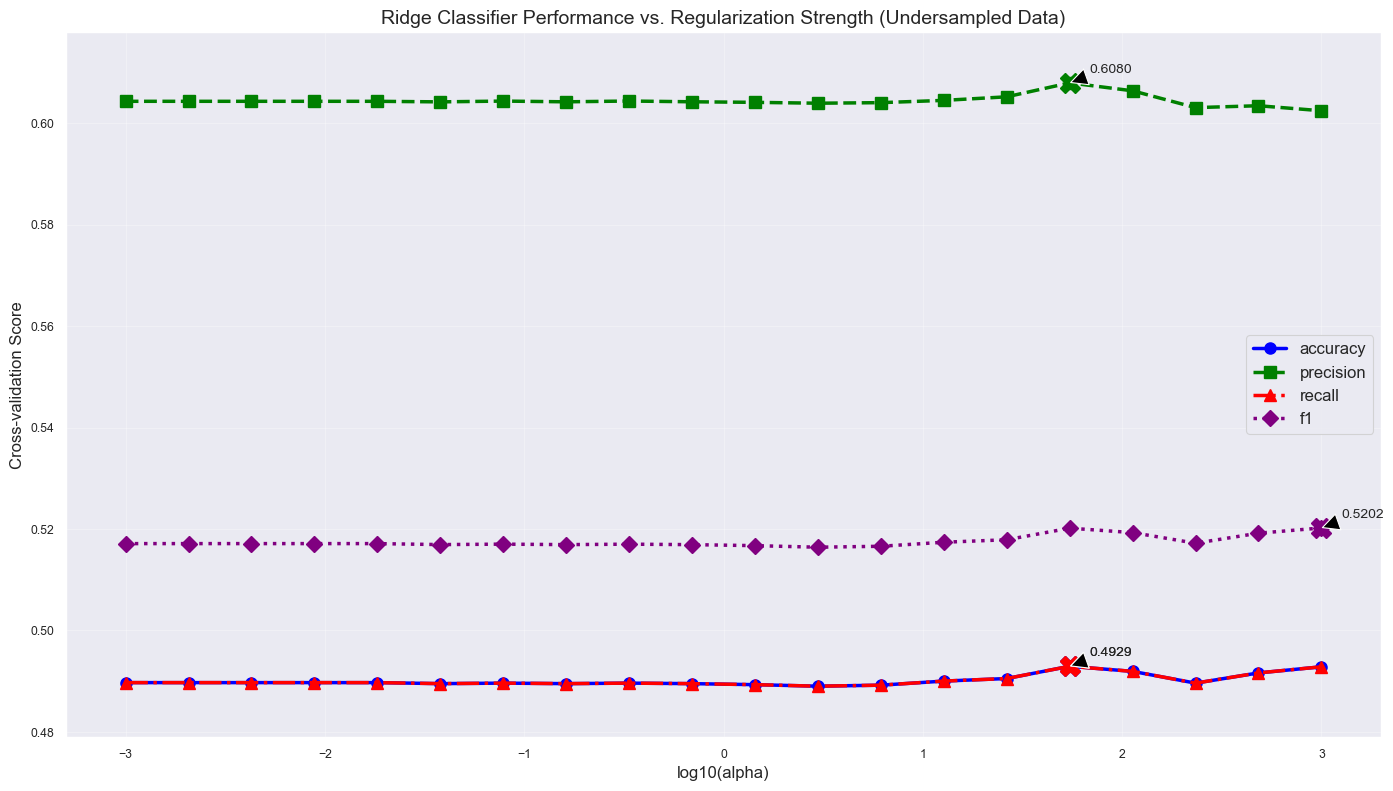


Final Model Performance with Optimal Alpha (Undersampled Data):
Optimal alpha: 1000.000000
Test Accuracy: 0.5020
Test Precision: 0.6068
Test Recall: 0.5020
Test F1 Score: 0.5280


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score, accuracy_score, recall_score, precision_score

X_train = X_train_final
y_train = y_train_final

alphas = np.logspace(-3, 3, 20)

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted', zero_division=0),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

cv_results = {
    'alpha': alphas,
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1': []
}

print("Finding optimal lambda (alpha) for RidgeClassifier on undersampled data...")
for alpha in alphas:
    model = RidgeClassifier(alpha=alpha, class_weight='balanced')
    
    for metric in scoring.keys():
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring=scoring[metric])
        cv_results[metric].append(np.mean(scores))
    

results_df = pd.DataFrame(cv_results)

best_alphas = {}
for metric in ['accuracy', 'precision', 'recall', 'f1']:
    best_idx = results_df[metric].idxmax()
    best_alphas[metric] = results_df.loc[best_idx, 'alpha']

plt.figure(figsize=(14, 8))
metrics = ['accuracy', 'precision', 'recall', 'f1']
colors = ['blue', 'green', 'red', 'purple']
linestyles = ['-', '--', '-.', ':']
markers = ['o', 's', '^', 'D']

for i, metric in enumerate(metrics):
    plt.plot(np.log10(alphas), cv_results[metric], 
             marker=markers[i], linestyle=linestyles[i], 
             color=colors[i], linewidth=2.5, markersize=8,
             label=f'{metric}')
    
    best_idx = cv_results[metric].index(max(cv_results[metric]))
    plt.plot(np.log10(alphas[best_idx]), max(cv_results[metric]), 
             'X', markersize=15, color=colors[i])

plt.xlabel('log10(alpha)', fontsize=12)
plt.ylabel('Cross-validation Score', fontsize=12)
plt.title('Ridge Classifier Performance vs. Regularization Strength (Undersampled Data)', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Annot. for the best points
for metric in metrics:
    best_idx = cv_results[metric].index(max(cv_results[metric]))
    best_alpha = alphas[best_idx]
    best_score = max(cv_results[metric])
    plt.annotate(f'{best_score:.4f}', 
                 xy=(np.log10(best_alpha), best_score),
                 xytext=(np.log10(best_alpha)+0.1, best_score+0.002),
                 fontsize=10,
                 arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))

y_min = min([min(cv_results[m]) for m in metrics]) - 0.01
y_max = max([max(cv_results[m]) for m in metrics]) + 0.01
plt.ylim(y_min, y_max)

plt.show()

optimal_alpha = best_alphas['f1']
final_model = RidgeClassifier(alpha=optimal_alpha, class_weight='balanced')
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test_final)
test_accuracy = accuracy_score(y_test_final, y_pred)
test_precision = precision_score(y_test_final, y_pred, average='weighted', zero_division=0)
test_recall = recall_score(y_test_final, y_pred, average='weighted')
test_f1 = f1_score(y_test_final, y_pred, average='weighted')

print("\nFinal Model Performance with Optimal Alpha (Undersampled Data):")
print(f"Optimal alpha: {optimal_alpha:.6f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")

Lasso Model Performance (Undersampled Data):
Train Accuracy: 0.4968, Test Accuracy: 0.4935
Train Precision: 0.6140, Test Precision: 0.6090
Train Recall: 0.4968, Test Recall: 0.4935
Train F1: 0.5239, Test F1: 0.5191


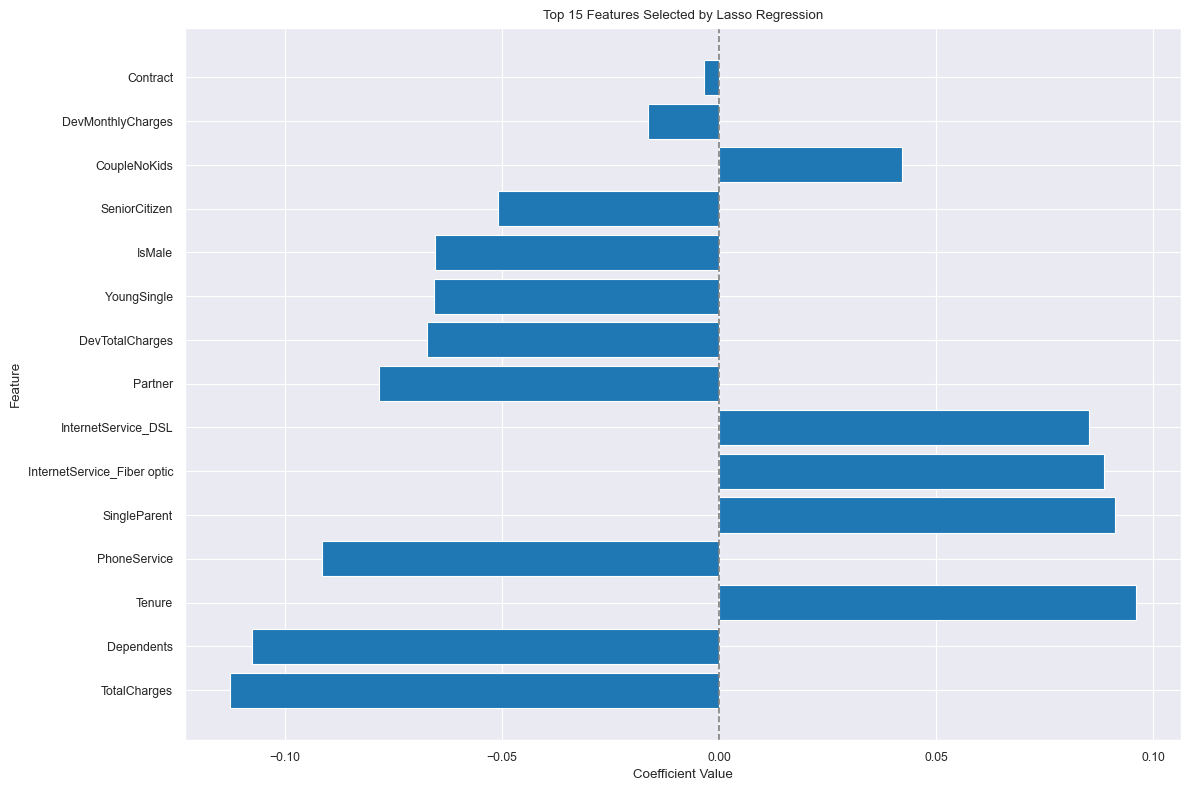

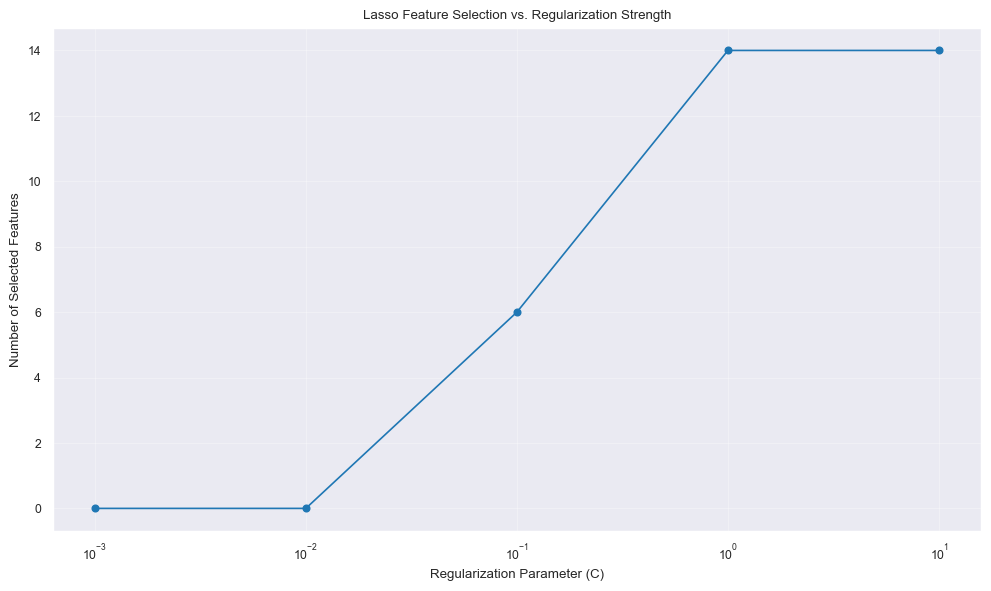

In [244]:

lasso_model = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, 
                                class_weight='balanced', random_state=42)

lasso_model.fit(X_train_final, y_train_final)

y_train_pred = lasso_model.predict(X_train_final)
y_test_pred = lasso_model.predict(X_test_final)

train_acc = accuracy_score(y_train_final, y_train_pred)
test_acc = accuracy_score(y_test_final, y_test_pred)
train_precision = precision_score(y_train_final, y_train_pred, average='weighted')
test_precision = precision_score(y_test_final, y_test_pred, average='weighted')
train_recall = recall_score(y_train_final, y_train_pred, average='weighted')
test_recall = recall_score(y_test_final, y_test_pred, average='weighted')
train_f1 = f1_score(y_train_final, y_train_pred, average='weighted')
test_f1 = f1_score(y_test_final, y_test_pred, average='weighted')

print("Lasso Model Performance (Undersampled Data):")
print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
print(f"Train Precision: {train_precision:.4f}, Test Precision: {test_precision:.4f}")
print(f"Train Recall: {train_recall:.4f}, Test Recall: {test_recall:.4f}")
print(f"Train F1: {train_f1:.4f}, Test F1: {test_f1:.4f}")

feature_names = X_train_under.columns
coefficients = lasso_model.coef_[0]

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(top_features['Feature'], top_features['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 15 Features Selected by Lasso Regression')
plt.axvline(x=0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

C_values = [0.001, 0.01, 0.1, 1.0, 10.0]
feature_counts = []

for C in C_values:
    model = LogisticRegression(penalty='l1', solver='liblinear', C=C, random_state=42)
    model.fit(X_train_under, y_train_under)
    
    nonzero_count = np.sum(model.coef_[0] != 0)
    feature_counts.append(nonzero_count)
    
plt.figure(figsize=(10, 6))
plt.plot(C_values, feature_counts, marker='o')
plt.xscale('log')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Number of Selected Features')
plt.title('Lasso Feature Selection vs. Regularization Strength')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

The Lasso model demonstrates effective feature selection while maintaining reasonable performance (test accuracy: 0.4935, precision: 0.6090, F1: 0.5191).

In the coefficient plot, we see Lasso's discriminatory power. `Tenure` shows the strongest positive influence (~0.09) on churn, while `internet services` (Fiber, DSL) and `SingleParent` status also increase churn probability. Conversely, `TotalCharges`, `Dependents`, and demographic factors like `IsMale` all reduce churn likelihood with negative coefficients around -0.05.

The regularization strength graph reveals the model's optimal complexity. At high regularization ($10^-3$), all features are eliminated. As regularization decreases, feature count increases until stabilizing at 14 features ($10^0$), likely representing our ideal bias-variance balance.
This automatic feature selection represents the balanced middle ground in our bias-variance "tug-of-war," identifying the most significant predictors and enabling more targeted customer retention strategies by focusing resources where they'll have maximum impact.